In [46]:
import requests 
import pandas as pd 
import numpy as np 

In [47]:
import pandas as pd

country_codes = ['IN', 'CN', 'US', 'ZA', 'NL']

dfs = []
for code in country_codes:
    df = pd.read_csv(f"WID_data_{code}.csv", sep=";")
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

print(df_combined.head(10))
print(df_combined.describe())



  country    variable percentile  year       value  age pop
0      IN  ehfcari999     p0p100  1990  312.117210  999   i
1      IN  ehfcari999     p0p100  1991  328.894016  999   i
2      IN  ehfcari999     p0p100  1992  355.461499  999   i
3      IN  ehfcari999     p0p100  1993  358.065985  999   i
4      IN  ehfcari999     p0p100  1994  370.890249  999   i
5      IN  ehfcari999     p0p100  1995  386.577885  999   i
6      IN  ehfcari999     p0p100  1996  424.230646  999   i
7      IN  ehfcari999     p0p100  1997  435.690896  999   i
8      IN  ehfcari999     p0p100  1998  444.676957  999   i
9      IN  ehfcari999     p0p100  1999  489.647561  999   i
               year         value           age
count  4.219340e+06  4.219340e+06  4.219340e+06
mean   1.977690e+03  1.476494e+11  9.898519e+02
std    4.207889e+01  2.610589e+14  6.274602e+01
min    1.800000e+03 -5.036594e+17  1.000000e+00
25%    1.960000e+03  4.480000e-02  9.920000e+02
50%    1.992000e+03  1.965195e+01  9.920000e+02
75% 

In [48]:
#filtering for valriable = "sptincj999" to filter out the income share stats
income_df = df_combined[df_combined['variable'] == 'sptincj999'].copy()
income_df.reset_index(drop=True, inplace=True)
pattern = r'^p(\d+\.?\d*)p(\d+\.?\d*)$'

income_df[['p_start', 'p_end']] = (
    income_df['percentile']
    .str.extract(pattern)
    .astype(float)
)
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = income_df[(income_df['p_start'] == 90) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_1 = income_df[(income_df['p_start'] == 99) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_0_1 = income_df[(income_df['p_start'] == 99.9) & (income_df['p_end'] == 100)].reset_index(drop=True)
bottom_50 = income_df[(income_df['p_start'] == 0) & (income_df['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
df_income_summary

country    variable percentile  year   value  age pop  p_start  p_end  \
0         IN  sptincj999    p90p100  1820  0.4800  999   j     90.0  100.0   
1         IN  sptincj999    p90p100  1850  0.5000  999   j     90.0  100.0   
2         IN  sptincj999    p90p100  1880  0.5460  999   j     90.0  100.0   
3         IN  sptincj999    p90p100  1900  0.5376  999   j     90.0  100.0   
4         IN  sptincj999    p90p100  1910  0.4480  999   j     90.0  100.0   
...      ...         ...        ...   ...     ...  ...  ..      ...    ...   
1475      NL  sptincj999      p0p50  2020  0.2370  999   j      0.0   50.0   
1476      NL  sptincj999      p0p50  2021  0.2358  999   j      0.0   50.0   
1477      NL  sptincj999      p0p50  2022  0.2278  999   j      0.0   50.0   
1478      NL  sptincj999      p0p50  2023  0.2197  999   j      0.0   50.0   
1479      NL  sptincj999      p0p50  2024  0.2197  999   j      0.0   50.0   

     income_distribution  
0                top_10%  
1                top_10%  
2                top_10%  
3                top_10%  
4                top_10%  
...                  ...  
1475          bottom_50%  
1476          bottom_50%  
1477          bottom_50%  
1478          bottom_50%  
1479          bottom_50%  

[1480 rows x 10 columns]

In [49]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'], 
    columns='income_distribution', 
    values='value'
).reset_index(drop=False)
df_wide 

income_distribution country  year  bottom_50%  top_0.1%  top_1%  top_10%
0                        CN  1820      0.1855    0.0527  0.1616   0.4648
1                        CN  1850      0.1812    0.0572  0.1735   0.4772
2                        CN  1880      0.1594    0.0560  0.1761   0.5124
3                        CN  1900      0.1571    0.0573  0.1784   0.5161
4                        CN  1910      0.1691    0.0720  0.2026   0.5120
..                      ...   ...         ...       ...     ...      ...
365                      ZA  2020      0.0627    0.0574  0.1921   0.6508
366                      ZA  2021      0.0627    0.0574  0.1921   0.6508
367                      ZA  2022      0.0627    0.0574  0.1921   0.6508
368                      ZA  2023      0.0627    0.0574  0.1921   0.6508
369                      ZA  2024      0.0558    0.0606  0.2186   0.6633

[370 rows x 6 columns]

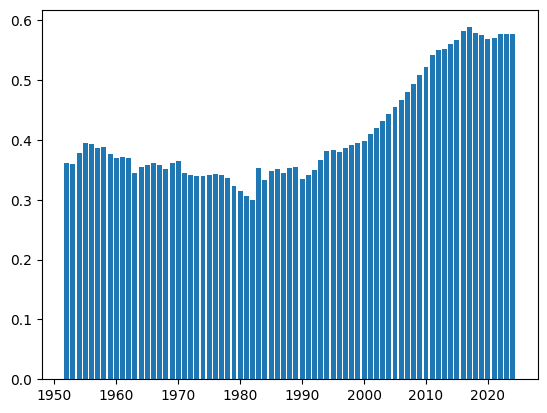

In [50]:
import matplotlib.pyplot as plt
df_income_summary = df_income_summary[df_income_summary['year']>=1952]
df_income = df_income_summary[(df_income_summary['income_distribution']=='bottom_50%') | (df_income_summary['income_distribution']=='top_10%') | (df_income_summary['income_distribution']=='top_1%')]

for country in ['IN']:
    df_plot = df_income[df_income['country']== country]
    plt.bar(df_plot['year'], df_plot['value'])
    plt.show()

In [51]:
df_income_summary.head()

country    variable percentile  year   value  age pop  p_start  p_end  \
10      IN  sptincj999    p90p100  1952  0.3610  999   j     90.0  100.0   
11      IN  sptincj999    p90p100  1953  0.3604  999   j     90.0  100.0   
12      IN  sptincj999    p90p100  1954  0.3788  999   j     90.0  100.0   
13      IN  sptincj999    p90p100  1955  0.3956  999   j     90.0  100.0   
14      IN  sptincj999    p90p100  1956  0.3925  999   j     90.0  100.0   

   income_distribution  
10             top_10%  
11             top_10%  
12             top_10%  
13             top_10%  
14             top_10%

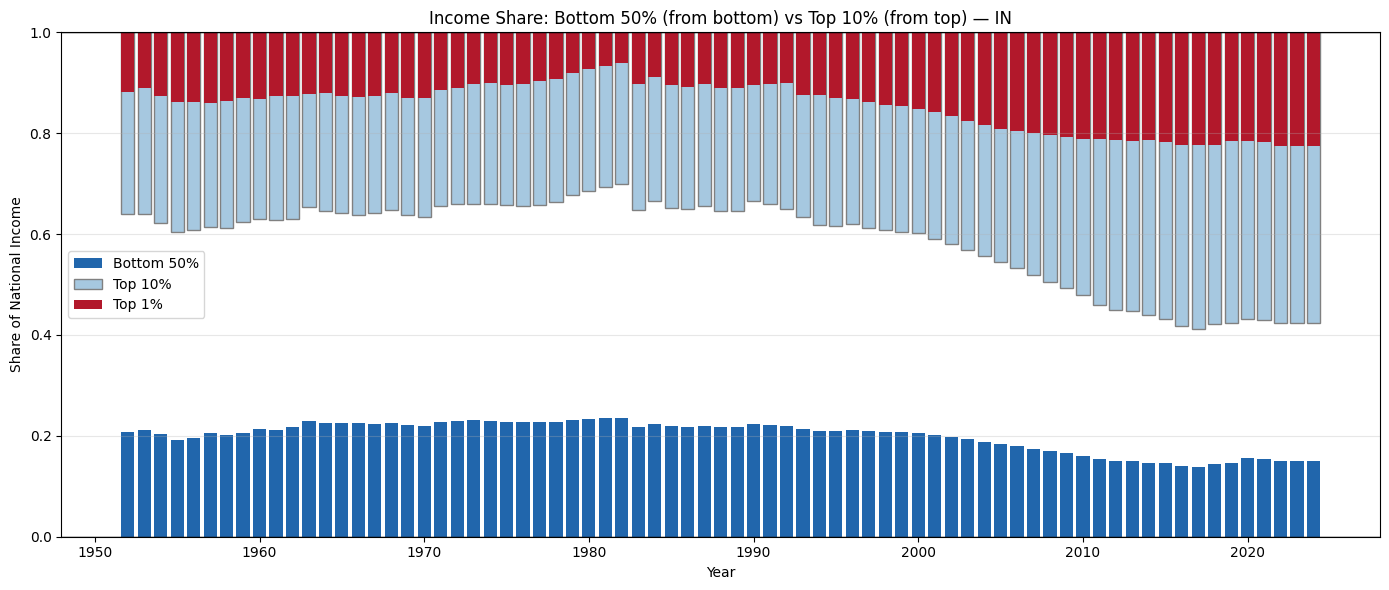

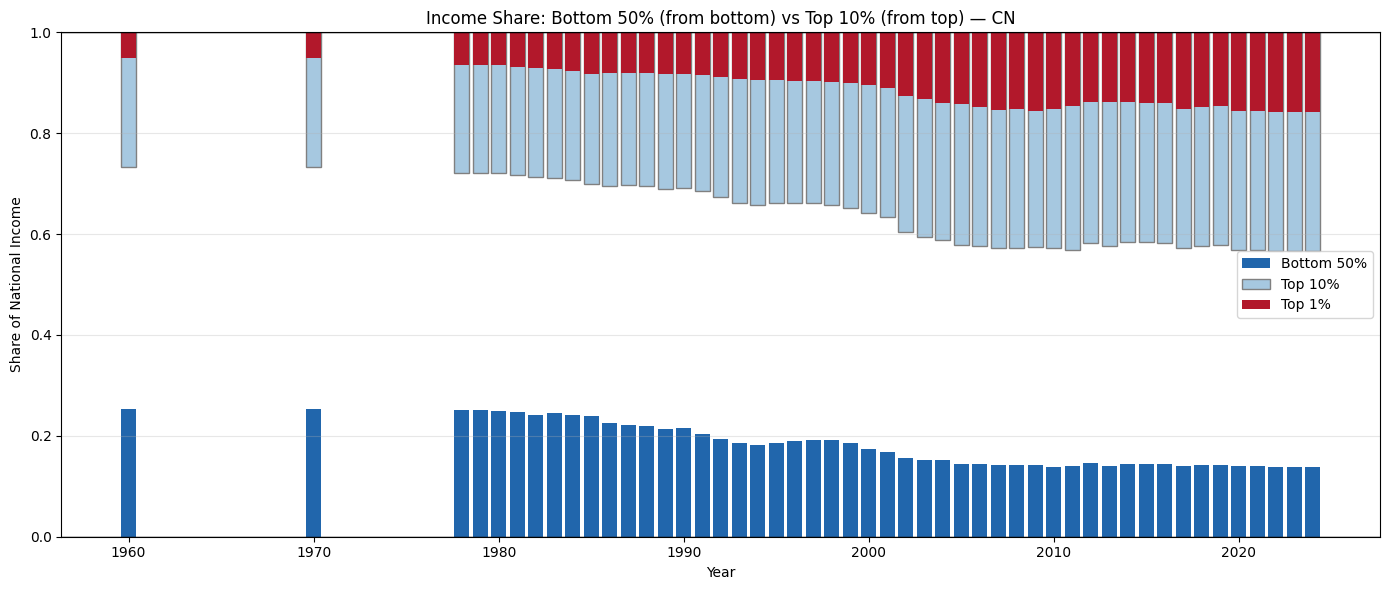

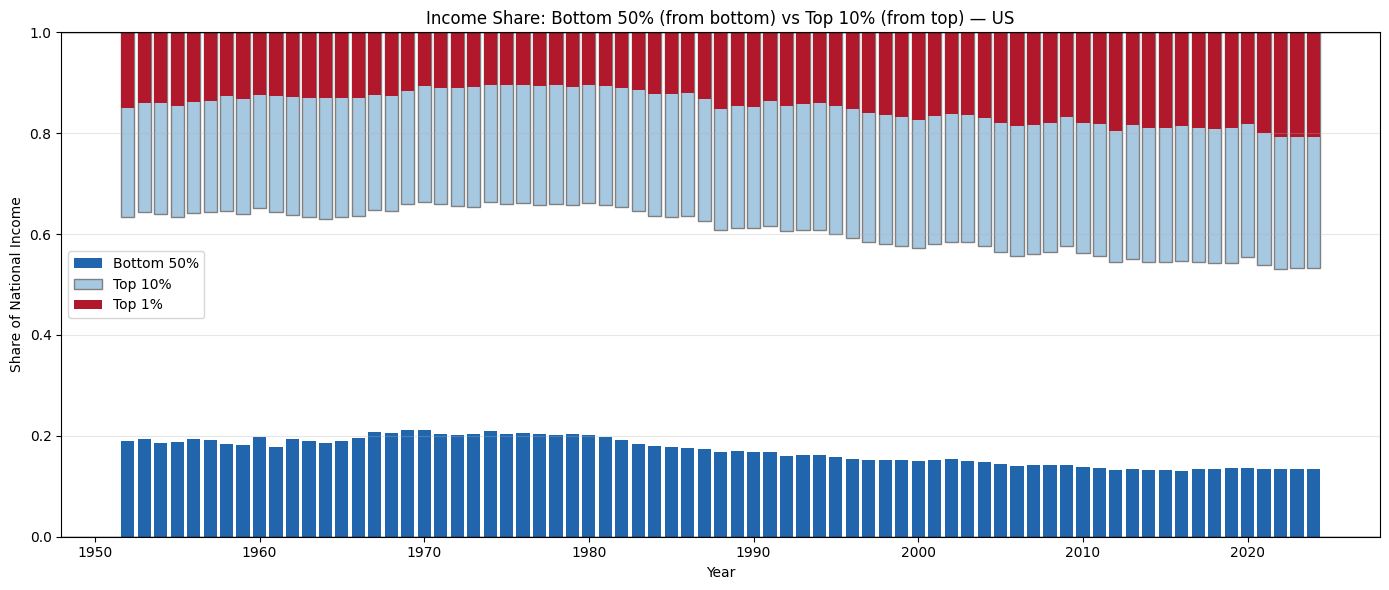

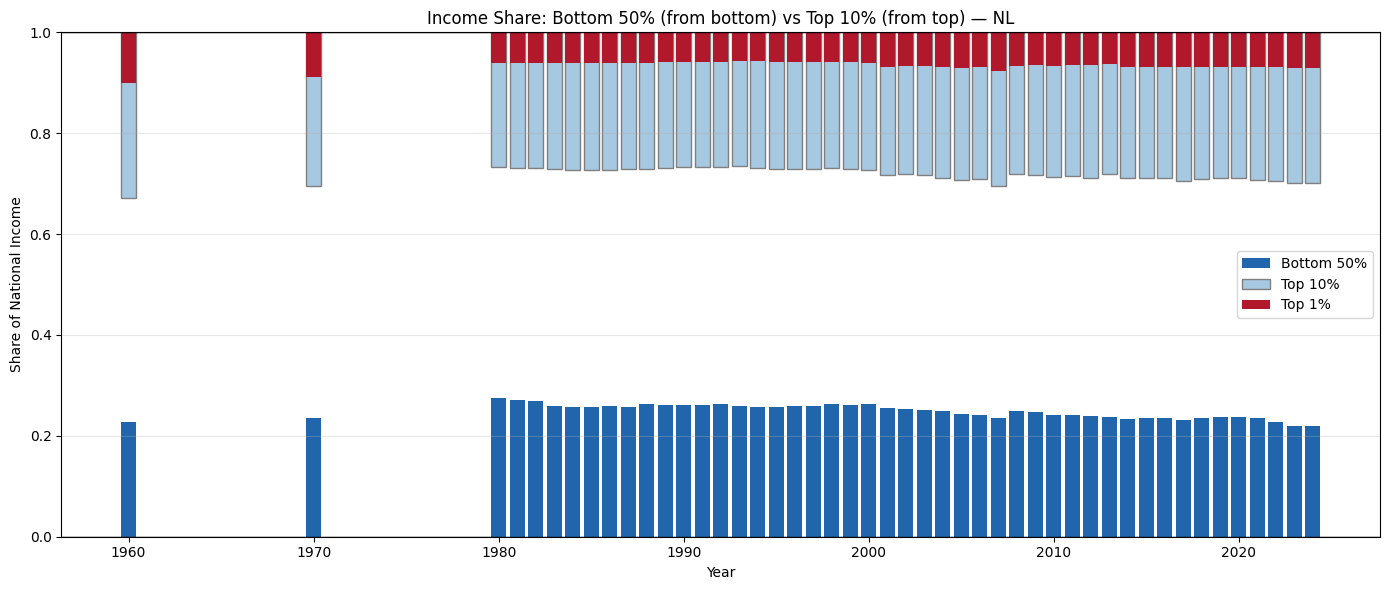

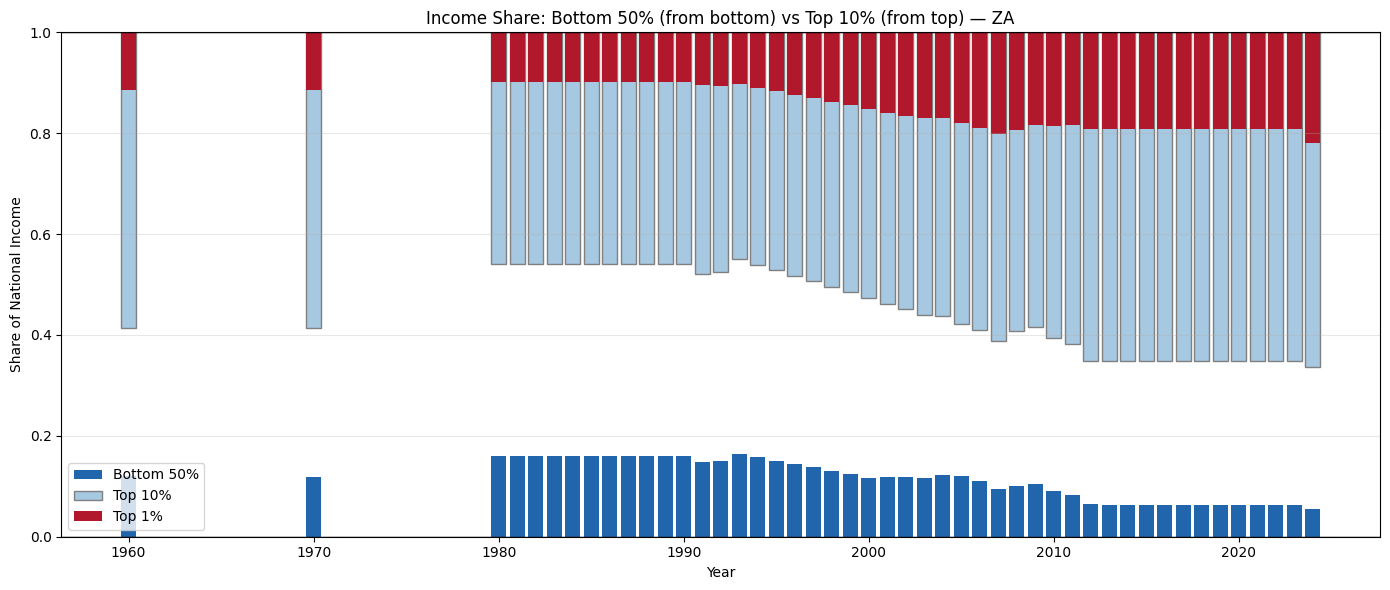

In [52]:
import matplotlib.pyplot as plt
bottom50_color = "#2166ac"   # blue
middle_color    = "#f7f7f7"  # light neutral
top_color       = "#b2182b"  # red
country_code = ['IN', 'CN', 'US', 'NL', 'ZA']
for code in country_code:
    # --- filter + pivot like you already did ---
    # df_country = df_wide[]
    df_plot = df_income_summary[(df_income_summary['country'] == code) & 
        (df_income_summary['year'] >= 1952)
    ]
    df_country = df_plot.pivot(
            index='year',
            columns='income_distribution',
            values='value'
        )
    #[['bottom_50%', 'top_10%', 'top_1%']]   # ensure order

    years    = df_country.index.values
    bottom50 = df_country['bottom_50%'].values
    top10    = df_country['top_10%'].values
    top1 = df_country['top_1%'].values

    fig, ax = plt.subplots(figsize=(14, 6))

    # # 1) Bottom 50%: bar from 0 up to bottom50
    # ax.bar(years, bottom50, width=0.8, color='tab:blue', label='Bottom 50%')
    # # 2) Top 10%: bar from 1 downward to (1 - top10)
    # ax.bar(years, top10, width=0.8, bottom=1 - top10, color='tab:orange', label='Top 10%')

    # ax.bar(years, top1, width=0.8, bottom=1 - top1, color='tab:red', label='Top 1%')
    ax.bar(years, bottom50, width=0.8, color="#2166ac", label="Bottom 50%")
    ax.bar(years, top10, width=0.8, bottom=1 - top10, color="#a6c8e0", edgecolor='grey', label="Top 10%")
    ax.bar(years, top1, width=0.8, bottom=1 - top1, color="#b2182b", label="Top 1%")

    # axis + cosmetics
    ax.set_ylim(0, 1)
    ax.axhline(0, color='black', linewidth=1)
    ax.axhline(1, color='black', linewidth=1)

    ax.set_title(f"Income Share: Bottom 50% (from bottom) vs Top 10% (from top) — {code}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Share of National Income")
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()

    plt.savefig(f'income_distribution_{code}.png')
    plt.show()


In [53]:
income_df['country'].unique() # contains the values of income share for entire distribution

array(['IN', 'CN', 'US', 'ZA', 'NL'], dtype=object)

In [54]:
import pandas as pd

# 2. Parse percentile "p0p10" -> p_start=0, p_end=10
def extract_bounds(s):
    s = s[1:]              # drop leading 'p'
    a, b = s.split('p')
    return float(a), float(b)

# 3. Keep only rows starting at 0% (these are cumulative bottom shares)
lorenz_points = income_df[income_df['p_start'] == 0].copy()

# 4. Convert to fractions 0–1
lorenz_points['cum_pop']    = lorenz_points['p_end'] / 100.0   # x-axis
lorenz_points['cum_income'] = lorenz_points['value']           # y-axis (already cumulative)

# For a single year:
year = 2024
lor_2024 = lorenz_points[lorenz_points['year'] == year]\
              .sort_values('cum_pop')
lor_2024.head(100)


country    variable percentile  year   value  age pop  p_start  p_end  \
165         IN  sptincj999       p0p1  2024  0.0008  999   j      0.0    1.0   
32209       CN  sptincj999       p0p1  2024  0.0000  999   j      0.0    1.0   
55192       US  sptincj999       p0p1  2024  0.0000  999   j      0.0    1.0   
121634      NL  sptincj999       p0p1  2024  0.0002  999   j      0.0    1.0   
99962       ZA  sptincj999       p0p1  2024  0.0001  999   j      0.0    1.0   
...        ...         ...        ...   ...     ...  ...  ..      ...    ...   
56713       US  sptincj999      p0p20  2024  0.0216  999   j      0.0   20.0   
122362      NL  sptincj999      p0p20  2024  0.0448  999   j      0.0   20.0   
1244        IN  sptincj999      p0p20  2024  0.0418  999   j      0.0   20.0   
100690      ZA  sptincj999      p0p20  2024  0.0098  999   j      0.0   20.0   
32963       CN  sptincj999      p0p20  2024  0.0173  999   j      0.0   20.0   

        cum_pop  cum_income  
165        0.01      0.0008  
32209      0.01      0.0000  
55192      0.01      0.0000  
121634     0.01      0.0002  
99962      0.01      0.0001  
...         ...         ...  
56713      0.20      0.0216  
122362     0.20      0.0448  
1244       0.20      0.0418  
100690     0.20      0.0098  
32963      0.20      0.0173  

[100 rows x 11 columns]

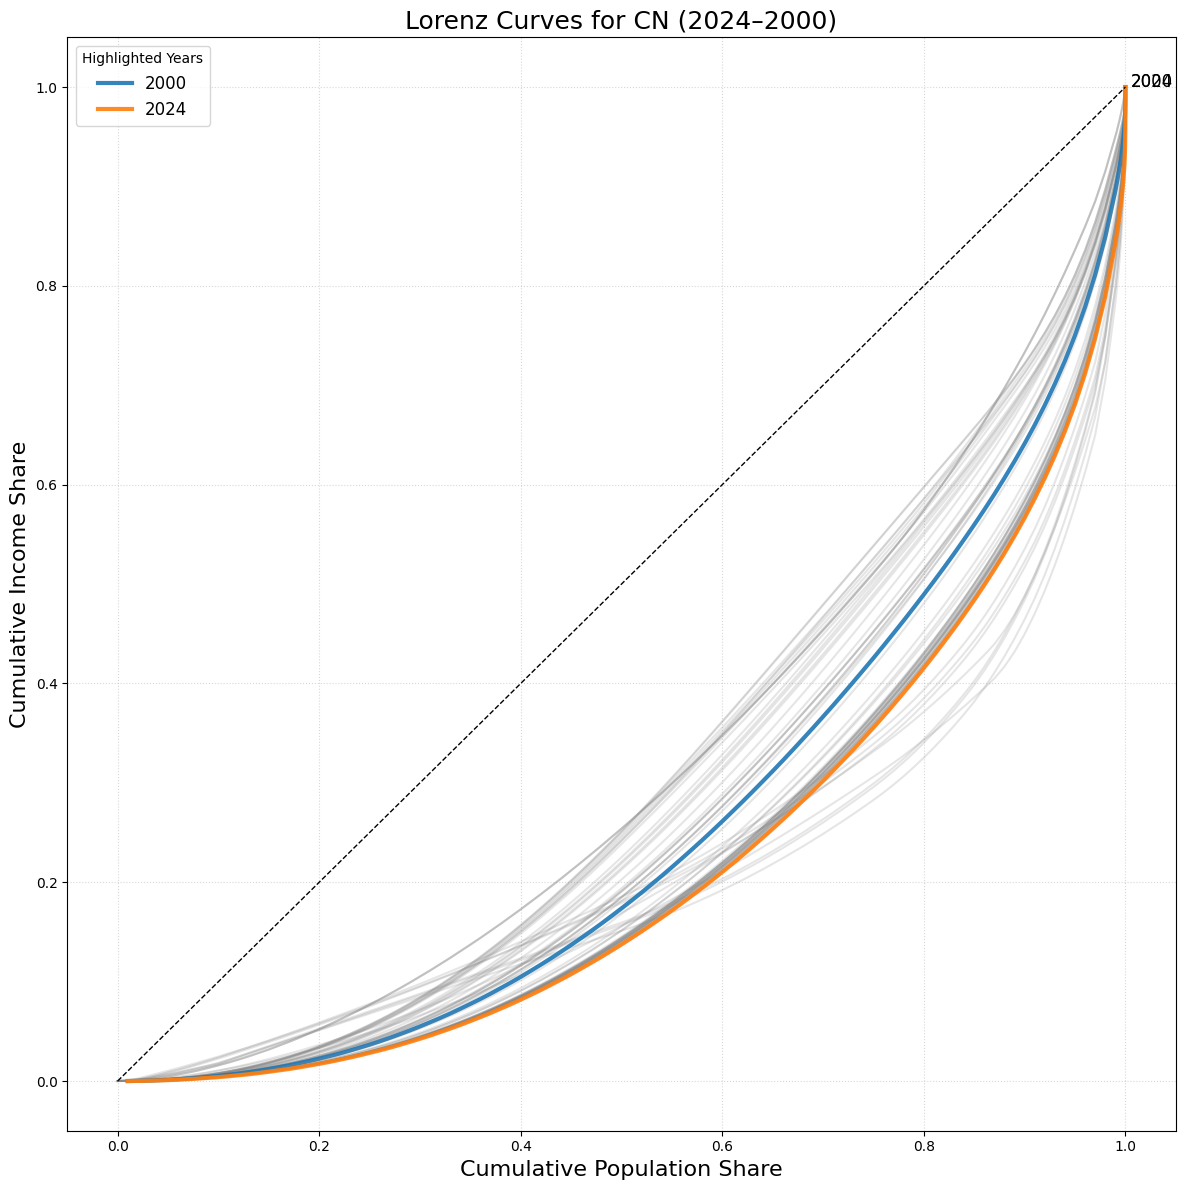

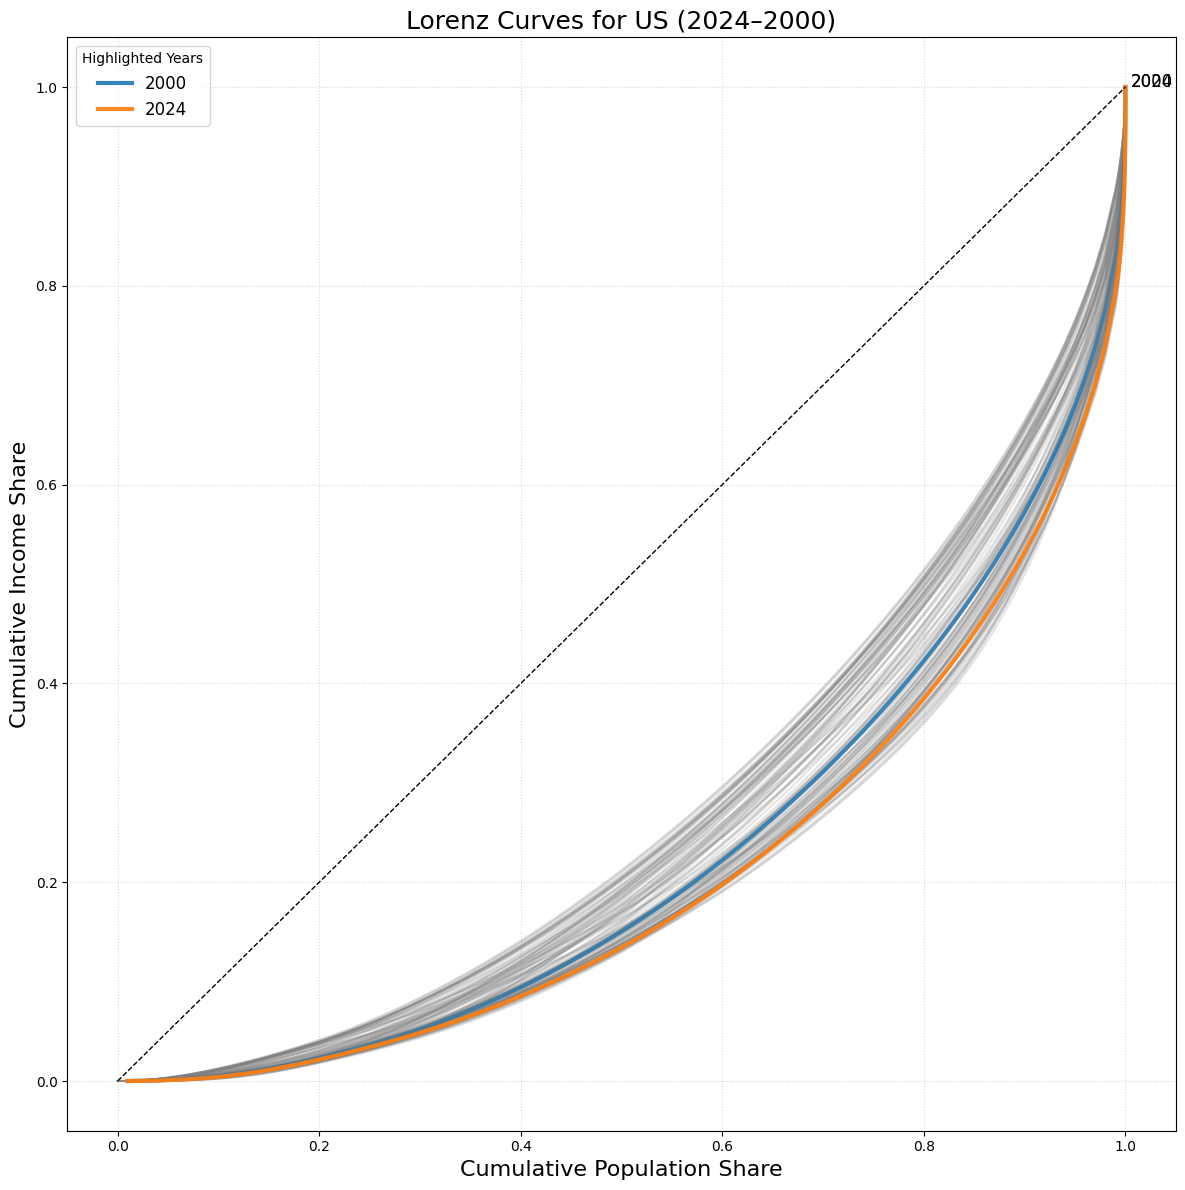

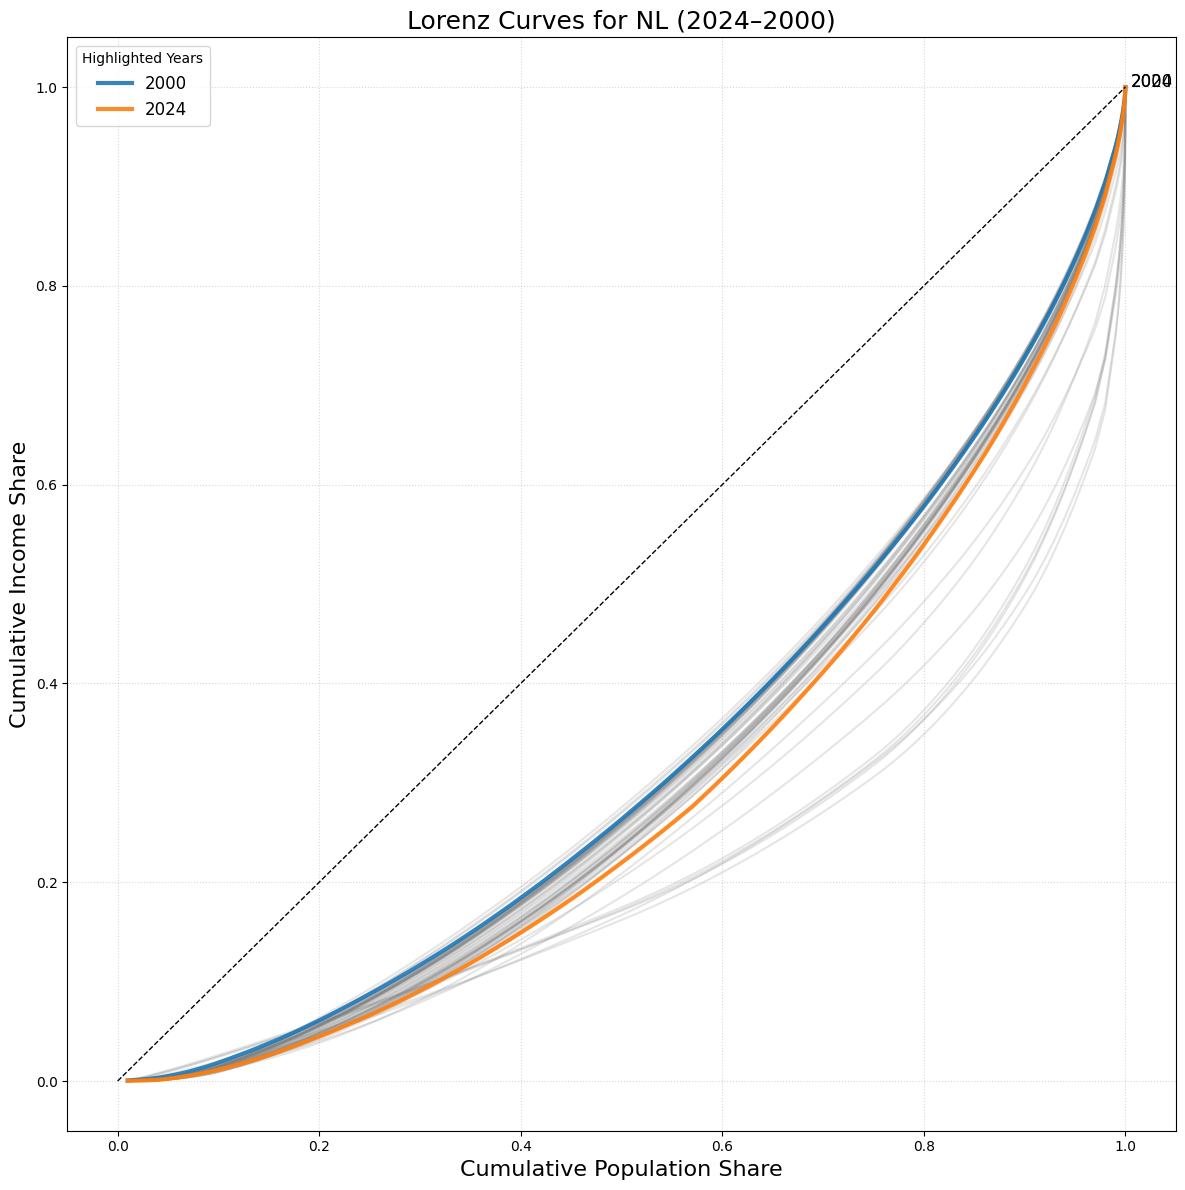

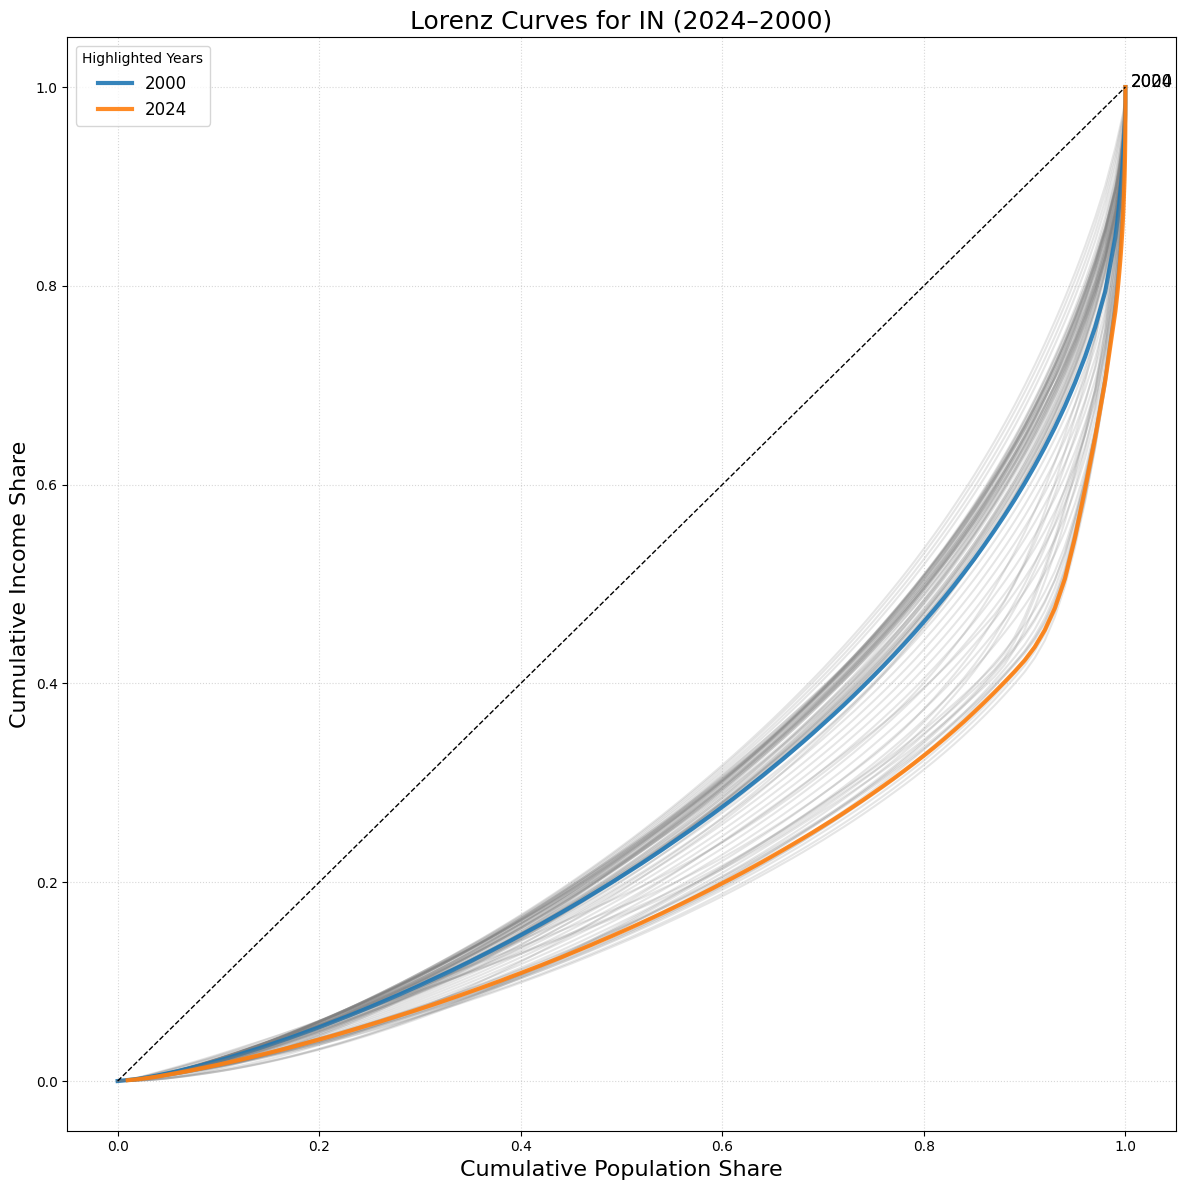

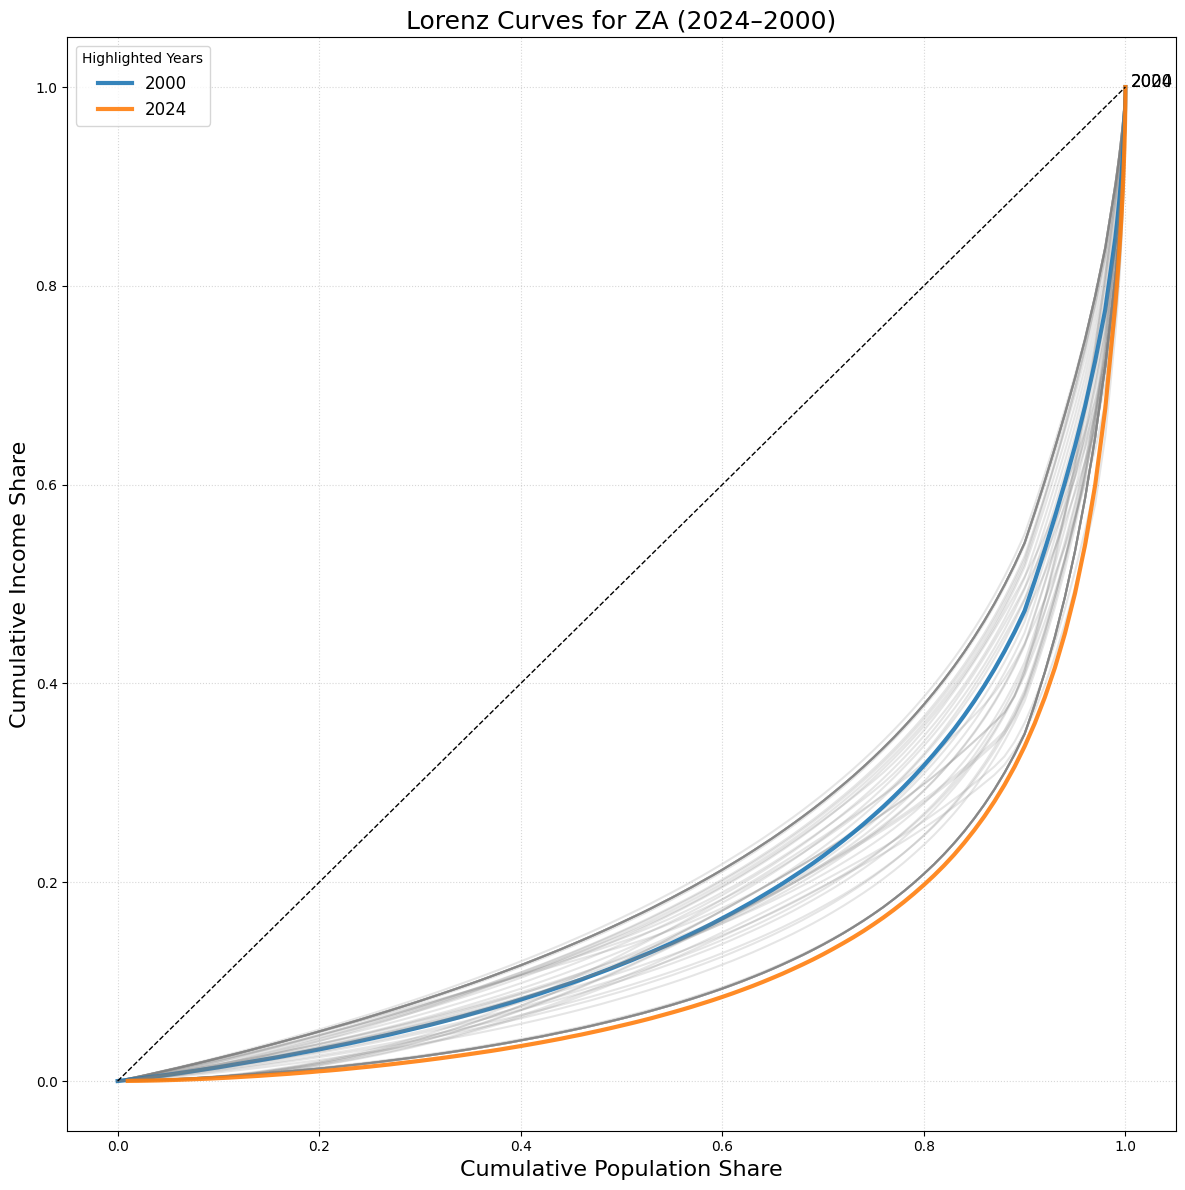

In [55]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'NL', 'IN', 'ZA']
for code in country_code:

    # Get available years for IN
    years = sorted(lorenz_points[lorenz_points['country']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 2000

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = lorenz_points[(lorenz_points['country']==code) & (lorenz_points['year']==year)]
        df_cnt = df_cnt.sort_values('cum_pop')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['cum_pop'].iloc[-1] + 0.005,
                    df_cnt['cum_income'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], 
                    color="gray", alpha=0.2)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Lorenz Curves for {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Income Share", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"lorenz_cured_{code}.png")
    plt.show()

In [56]:
from pandas_datareader import data, wb

start_year = 1952
end_year = 2024
countries = ['USA','IND','CHN','BRA','ZAF', 'NLD']  # ISO3 codes accepted
# Indicators dictionary
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NY.GNP.MKTP.CD': 'national_income',
    'NE.TRD.GNFS.ZS': 'trade_openness',
    'SL.TLF.ADVN.ZS': 'education_atainment',
    'PA.NUS.PPP': 'ppp_to_usd',
    'PA.NUS.FCRF': 'fx_to_usd',
    # 'SE.XPD.TOTL.GD.ZS': 'edu_spend_pct_gdp',
    # 'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'SP.POP.TOTL': 'population'
}

from functools import reduce
frames = []
for code, name in indicators.items():
    print('Downloading', code)
    try:
        # Use wb.download, which is more robust for World Bank data and accepts 'country'
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns

        # Rename columns: the indicator code to its friendly name, and 'country' to 'country_name'
        df = df.rename(columns={'country': 'country_name', code: name})
        print(f"downaloding for {name} of shape: {df.shape} and sample: {df.head(5)}")
        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)
indicators_df.columns

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for gdp_percap_const of shape: (390, 3) and sample:   country_name  year  gdp_percap_const
0       Brazil  2024       9564.576077
1       Brazil  2023       9288.027015
2       Brazil  2022       9032.084816
3       Brazil  2021       8799.229458
4       Brazil  2020       8435.011433


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for unemployment_pct of shape: (390, 3) and sample:   country_name  year  unemployment_pct
0       Brazil  2024             7.634
1       Brazil  2023             7.947
2       Brazil  2022             9.231
3       Brazil  2021            13.158
4       Brazil  2020            13.697


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for inflation_pct of shape: (390, 3) and sample:   country_name  year  inflation_pct
0       Brazil  2024       4.367464
1       Brazil  2023       4.593563
2       Brazil  2022       9.280106
3       Brazil  2021       8.301660
4       Brazil  2020       3.211768


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for national_income of shape: (390, 3) and sample:   country_name  year  national_income
0       Brazil  2024     2.112481e+12
1       Brazil  2023     2.121606e+12
2       Brazil  2022     1.895346e+12
3       Brazil  2021     1.618525e+12
4       Brazil  2020     1.445311e+12


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for trade_openness of shape: (390, 3) and sample:   country_name  year  trade_openness
0       Brazil  2024       35.531220
1       Brazil  2023       33.666230
2       Brazil  2022       38.816066
3       Brazil  2021       37.656331
4       Brazil  2020       32.302079


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for education_atainment of shape: (390, 3) and sample:   country_name  year  education_atainment
0       Brazil  2024               81.882
1       Brazil  2023               81.665
2       Brazil  2022               81.872
3       Brazil  2021               80.528
4       Brazil  2020               79.400


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for ppp_to_usd of shape: (390, 3) and sample:   country_name  year  ppp_to_usd
0       Brazil  2024    2.480586
1       Brazil  2023    2.447609
2       Brazil  2022    2.411273
3       Brazil  2021    2.379274
4       Brazil  2020    2.264911


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


downaloding for fx_to_usd of shape: (390, 3) and sample:   country_name  year  fx_to_usd
0       Brazil  2024   5.388935
1       Brazil  2023   4.994380
2       Brazil  2022   5.163970
3       Brazil  2021   5.394401
4       Brazil  2020   5.155179
downaloding for population of shape: (390, 3) and sample:   country_name  year  population
0       Brazil  2024   211998573
1       Brazil  2023   211140729
2       Brazil  2022   210306415
3       Brazil  2021   209550294
4       Brazil  2020   208660842


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_43795/4166143645.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


Index(['country_name', 'year', 'gdp_percap_const', 'unemployment_pct',
       'inflation_pct', 'national_income', 'trade_openness',
       'education_atainment', 'ppp_to_usd', 'fx_to_usd', 'population'],
      dtype='object')

In [57]:
indicators_df.head(10)

country_name  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0       Brazil  1960       2603.519010               NaN            NaN   
1       Brazil  1961       2743.388888               NaN            NaN   
2       Brazil  1962       2838.472299               NaN            NaN   
3       Brazil  1963       2772.579949               NaN            NaN   
4       Brazil  1964       2785.074432               NaN            NaN   
5       Brazil  1965       2772.671764               NaN            NaN   
6       Brazil  1966       2878.699793               NaN            NaN   
7       Brazil  1967       2921.372426               NaN            NaN   
8       Brazil  1968       3126.535482               NaN            NaN   
9       Brazil  1969       3338.762474               NaN            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     1.516557e+10       12.615472                  NaN         NaN   
1     1.523685e+10       12.893397                  NaN         NaN   
2     1.992629e+10        9.384850                  NaN         NaN   
3     2.302148e+10       17.939984                  NaN         NaN   
4     2.121189e+10       12.205805                  NaN         NaN   
5     2.179004e+10       12.892035                  NaN         NaN   
6     2.582398e+10       12.263294                  NaN         NaN   
7     2.955916e+10       11.354384                  NaN         NaN   
8     3.306570e+10       12.590626                  NaN         NaN   
9     3.678372e+10       13.275925                  NaN         NaN   

      fx_to_usd  population  
0  8.099705e-14    72388126  
1  1.168435e-13    74605447  
2  1.677642e-13    76865323  
3  2.488694e-13    79164235  
4  5.420239e-13    81488595  
5  8.216549e-13    83817583  
6  9.607131e-13    86139359  
7  1.152603e-12    88446124  
8  1.469595e-12    90741240  
9  1.763363e-12    93045777

In [58]:
indicators_df.isna().sum()

country_name             0
year                     0
gdp_percap_const         0
unemployment_pct       186
inflation_pct           57
national_income          0
trade_openness           9
education_atainment    262
ppp_to_usd             180
fx_to_usd                0
population               0
dtype: int64

In [59]:
# Example structure for indicators_df:
# columns we expect: country, year, national_income, population, inflation_pct, ppp_to_usd, fx_to_usd

# Make sure we only keep the countries we care about
indicators_panel = indicators_df[indicators_df['country_name'].isin(indicators_df['country_name'].unique())].copy()

# Sort for time-series ops
indicators_panel = indicators_panel.sort_values(['country_name', 'year']).rename(columns={'country_name':'country'})
indicators_panel.head(10)

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0  Brazil  1960       2603.519010               NaN            NaN   
1  Brazil  1961       2743.388888               NaN            NaN   
2  Brazil  1962       2838.472299               NaN            NaN   
3  Brazil  1963       2772.579949               NaN            NaN   
4  Brazil  1964       2785.074432               NaN            NaN   
5  Brazil  1965       2772.671764               NaN            NaN   
6  Brazil  1966       2878.699793               NaN            NaN   
7  Brazil  1967       2921.372426               NaN            NaN   
8  Brazil  1968       3126.535482               NaN            NaN   
9  Brazil  1969       3338.762474               NaN            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     1.516557e+10       12.615472                  NaN         NaN   
1     1.523685e+10       12.893397                  NaN         NaN   
2     1.992629e+10        9.384850                  NaN         NaN   
3     2.302148e+10       17.939984                  NaN         NaN   
4     2.121189e+10       12.205805                  NaN         NaN   
5     2.179004e+10       12.892035                  NaN         NaN   
6     2.582398e+10       12.263294                  NaN         NaN   
7     2.955916e+10       11.354384                  NaN         NaN   
8     3.306570e+10       12.590626                  NaN         NaN   
9     3.678372e+10       13.275925                  NaN         NaN   

      fx_to_usd  population  
0  8.099705e-14    72388126  
1  1.168435e-13    74605447  
2  1.677642e-13    76865323  
3  2.488694e-13    79164235  
4  5.420239e-13    81488595  
5  8.216549e-13    83817583  
6  9.607131e-13    86139359  
7  1.152603e-12    88446124  
8  1.469595e-12    90741240  
9  1.763363e-12    93045777

In [60]:
# --- 3A. Build a CPI index from yoy inflation, per country ---
# Assume inflation_pct is e.g. 5 for 5% (not 0.05)

indicators_panel['inflation_factor'] = 1 + indicators_panel['inflation_pct'] / 100.0

cpi_list = []
for c, df_c in indicators_panel.groupby('country'):
    df_c = df_c.sort_values('year').copy()
    # set first year CPI = 1, then cumprod
    df_c['cpi_index'] = df_c['inflation_factor'].cumprod()
    cpi_list.append(df_c)

indicators_panel = pd.concat(cpi_list, ignore_index=True)

# --- 3B. Choose base year for constant prices ---
BASE_YEAR = 2000

base_cpi = indicators_panel.loc[indicators_panel['year'] == f'{BASE_YEAR}', ['country', 'cpi_index']].rename(
    columns={'cpi_index': 'cpi_base'}
)
base_cpi

country      cpi_base
40          Brazil  1.470633e+11
105          China  1.586191e+00
170          India  2.188161e+01
235    Netherlands  4.802545e+00
300   South Africa  3.423082e+01
365  United States  5.907376e+00

In [61]:
indicators_panel[indicators_panel['year'] == '2024']

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
64          Brazil  2024       9564.576077             7.634       4.367464   
129          China  2024      13121.676991             4.571       0.218129   
194          India  2024       2396.712719             4.202       4.953036   
259    Netherlands  2024      51471.049632             3.599       3.347543   
324   South Africa  2024       5708.964422            33.168       4.361152   
389  United States  2024      66682.614704             4.106       2.949525   

     national_income  trade_openness  education_atainment  ppp_to_usd  \
64      2.112481e+12       35.531220               81.882    2.480586   
129     1.861304e+13       37.198420                  NaN    3.532549   
194     3.856153e+12       44.671093               65.309   20.445669   
259     1.210379e+12      156.173668               80.018    0.748370   
324     3.923527e+11       61.702598               80.841    7.414911   
389     2.924311e+13       24.887992               71.592    1.000000   

     fx_to_usd  population  inflation_factor     cpi_index  
64    5.388935   211998573          1.043675  6.248980e+11  
129   7.197491  1408975000          1.002181  2.596001e+00  
194  83.669282  1450935791          1.049530  9.165403e+01  
259   0.923890    17994237          1.033475  8.338041e+00  
324  18.328658    64007187          1.043612  1.160589e+02  
389   1.000000   340110988          1.029495  1.076119e+01

In [62]:
indicators_panel = indicators_panel.merge(base_cpi, on='country', how='left')

# --- 3C. Compute national income per adult and real version ---
# If your `national_income` is already "per adult", skip dividing by population.
# Here I assume it's TOTAL national income in local currency.

indicators_panel['national_income_per_adult_nominal'] = (
    indicators_panel['national_income'] / indicators_panel['population']
)

# Constant-price (real) local currency, comparable across years
indicators_panel['net_income_real_local'] = (
    indicators_panel['national_income_per_adult_nominal'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
indicators_panel.head(5)

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0  Brazil  1960       2603.519010               NaN            NaN   
1  Brazil  1961       2743.388888               NaN            NaN   
2  Brazil  1962       2838.472299               NaN            NaN   
3  Brazil  1963       2772.579949               NaN            NaN   
4  Brazil  1964       2785.074432               NaN            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     1.516557e+10       12.615472                  NaN         NaN   
1     1.523685e+10       12.893397                  NaN         NaN   
2     1.992629e+10        9.384850                  NaN         NaN   
3     2.302148e+10       17.939984                  NaN         NaN   
4     2.121189e+10       12.205805                  NaN         NaN   

      fx_to_usd  population  inflation_factor  cpi_index      cpi_base  \
0  8.099705e-14    72388126               NaN        NaN  1.470633e+11   
1  1.168435e-13    74605447               NaN        NaN  1.470633e+11   
2  1.677642e-13    76865323               NaN        NaN  1.470633e+11   
3  2.488694e-13    79164235               NaN        NaN  1.470633e+11   
4  5.420239e-13    81488595               NaN        NaN  1.470633e+11   

   national_income_per_adult_nominal  net_income_real_local  
0                         209.503557                    NaN  
1                         204.232472                    NaN  
2                         259.236455                    NaN  
3                         290.806540                    NaN  
4                         260.305043                    NaN

In [63]:
# ppp_to_usd: local currency per 1 PPP USD
# fx_to_usd:  local currency per 1 market USD

# Real PPP income per adult (constant prices, PPP-adjusted)
indicators_panel['net_income_ppp'] = (
    indicators_panel['net_income_real_local']*indicators_panel['fx_to_usd'] / indicators_panel['ppp_to_usd']
)

# Real income per adult in market USD (constant prices)
indicators_panel['net_income_usd_fx'] = (
    indicators_panel['net_income_real_local'] / indicators_panel['fx_to_usd']
)
indicators_panel['national_income_real_usd'] = (
    indicators_panel['national_income'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
indicators_panel[['country', 'year', 'national_income_real_usd', 'national_income', 'net_income_real_local', 'net_income_ppp', 'net_income_usd_fx']].head()


country  year  national_income_real_usd  national_income  \
0  Brazil  1960                       NaN     1.516557e+10   
1  Brazil  1961                       NaN     1.523685e+10   
2  Brazil  1962                       NaN     1.992629e+10   
3  Brazil  1963                       NaN     2.302148e+10   
4  Brazil  1964                       NaN     2.121189e+10   

   net_income_real_local  net_income_ppp  net_income_usd_fx  
0                    NaN             NaN                NaN  
1                    NaN             NaN                NaN  
2                    NaN             NaN                NaN  
3                    NaN             NaN                NaN  
4                    NaN             NaN                NaN

In [64]:
indicators_panel[indicators_panel['country']=='India'].head(100)

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
130   India  1960        312.777848               NaN       1.779878   
131   India  1961        316.739645               NaN       1.695213   
132   India  1962        318.381946               NaN       3.632215   
133   India  1963        329.641495               NaN       2.946161   
134   India  1964        346.011883               NaN      13.355261   
..      ...   ...               ...               ...            ...   
190   India  2020       1806.501106             7.859       6.623437   
191   India  2021       1965.309434             6.380       5.131407   
192   India  2022       2098.211245             4.822       6.699034   
193   India  2023       2270.905181             4.172       5.649143   
194   India  2024       2396.712719             4.202       4.953036   

     national_income  trade_openness  education_atainment  ppp_to_usd  \
130     3.687868e+10       11.296833                  NaN         NaN   
131     3.902664e+10       10.261163                  NaN         NaN   
132     4.193468e+10       10.200790                  NaN         NaN   
133     4.818672e+10       10.187338                  NaN         NaN   
134     5.617579e+10        9.410549                  NaN         NaN   
..               ...             ...                  ...         ...   
190     2.638922e+12       37.758105               61.103   20.319366   
191     3.129983e+12       45.423089               61.889   20.727896   
192     3.300028e+12       50.075270               63.462   20.489457   
193     3.588704e+12       44.992842               65.269   20.290405   
194     3.856153e+12       44.671093               65.309   20.445669   

     fx_to_usd  population  inflation_factor  cpi_index  cpi_base  \
130   4.761900   435990338          1.017799   1.017799  21.88161   
131   4.761900   446564729          1.016952   1.035053  21.88161   
132   4.761900   457283090          1.036322   1.072648  21.88161   
133   4.761900   468138575          1.029462   1.104250  21.88161   
134   4.761900   479229598          1.133553   1.251725  21.88161   
..         ...         ...               ...        ...       ...   
190  74.099567  1402617695          1.066234  73.688143  21.88161   
191  73.918013  1414203896          1.051314  77.469382  21.88161   
192  78.604491  1425423212          1.066990  82.659082  21.88161   
193  82.599276  1438069596          1.056491  87.328612  21.88161   
194  83.669282  1450935791          1.049530  91.654029  21.88161   

     national_income_per_adult_nominal  net_income_real_local  net_income_ppp  \
130                          84.586011            1818.510823             NaN   
131                          87.393009            1847.538631             NaN   
132                          91.703985            1870.726339             NaN   
133                         102.932605            2039.693261             NaN   
134                         117.221035            2049.159512             NaN   
..                                 ...                    ...             ...   
190                        1881.426433             558.687428     2037.391104   
191                        2213.247225             625.142618     2229.329047   
192                        2315.121755             612.861764     2351.145089   
193                        2495.500887             625.288498     2545.458132   
194                        2657.700725             634.503150     2596.560761   

     net_income_usd_fx  national_income_real_usd  
130         381.887654              7.928531e+11  
131         387.983500              8.250456e+11  
132         392.852924              8.554515e+11  
133         428.336013              9.548591e+11  
134         430.323927              9.820179e+11  
..                 ...                       ...  
190           7.539685              7.836249e+11  
191           8.457243              8.840791e+11  
1

In [65]:
indicators_panel.to_csv("indicators.csv")

In [66]:
indicators_df = indicators_panel.copy()
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
country_name_to_code_map = {
    'Brazil': 'BR',
    
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'Netherlands': 'NL',
    'South Africa': 'ZA'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
# indicators_df
print(indicators_df.shape)
indicators_df.head()

(390, 20)


country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0  Brazil  1960       2603.519010               NaN            NaN   
1  Brazil  1961       2743.388888               NaN            NaN   
2  Brazil  1962       2838.472299               NaN            NaN   
3  Brazil  1963       2772.579949               NaN            NaN   
4  Brazil  1964       2785.074432               NaN            NaN   

   national_income  trade_openness  education_atainment  ppp_to_usd  \
0     1.516557e+10       12.615472                  NaN         NaN   
1     1.523685e+10       12.893397                  NaN         NaN   
2     1.992629e+10        9.384850                  NaN         NaN   
3     2.302148e+10       17.939984                  NaN         NaN   
4     2.121189e+10       12.205805                  NaN         NaN   

      fx_to_usd  population  inflation_factor  cpi_index      cpi_base  \
0  8.099705e-14    72388126               NaN        NaN  1.470633e+11   
1  1.168435e-13    74605447               NaN        NaN  1.470633e+11   
2  1.677642e-13    76865323               NaN        NaN  1.470633e+11   
3  2.488694e-13    79164235               NaN        NaN  1.470633e+11   
4  5.420239e-13    81488595               NaN        NaN  1.470633e+11   

   national_income_per_adult_nominal  net_income_real_local  net_income_ppp  \
0                         209.503557                    NaN             NaN   
1                         204.232472                    NaN             NaN   
2                         259.236455                    NaN             NaN   
3                         290.806540                    NaN             NaN   
4                         260.305043                    NaN             NaN   

   net_income_usd_fx  national_income_real_usd country_code  
0                NaN                       NaN           BR  
1                NaN                       NaN           BR  
2                NaN                       NaN           BR  
3                NaN                       NaN           BR  
4                NaN                       NaN           BR

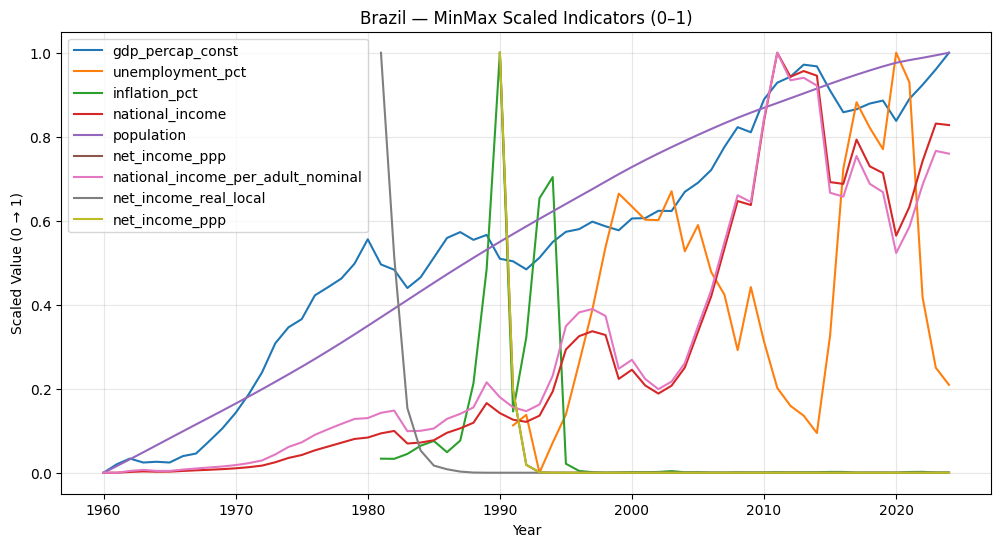

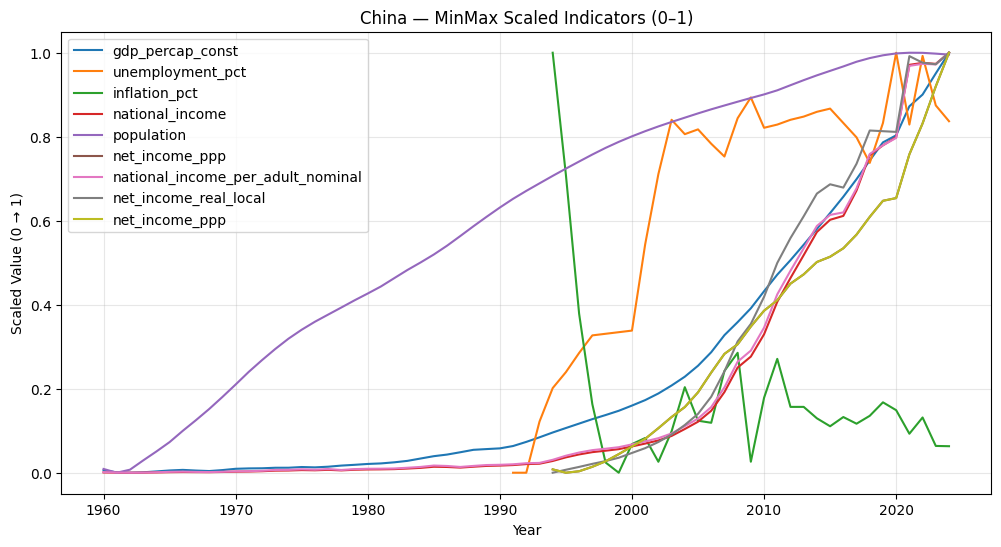

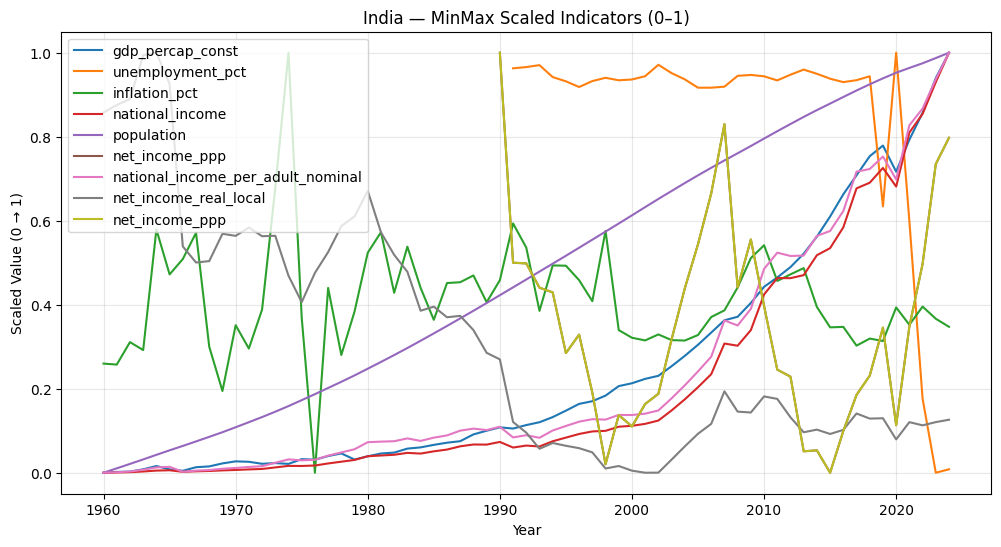

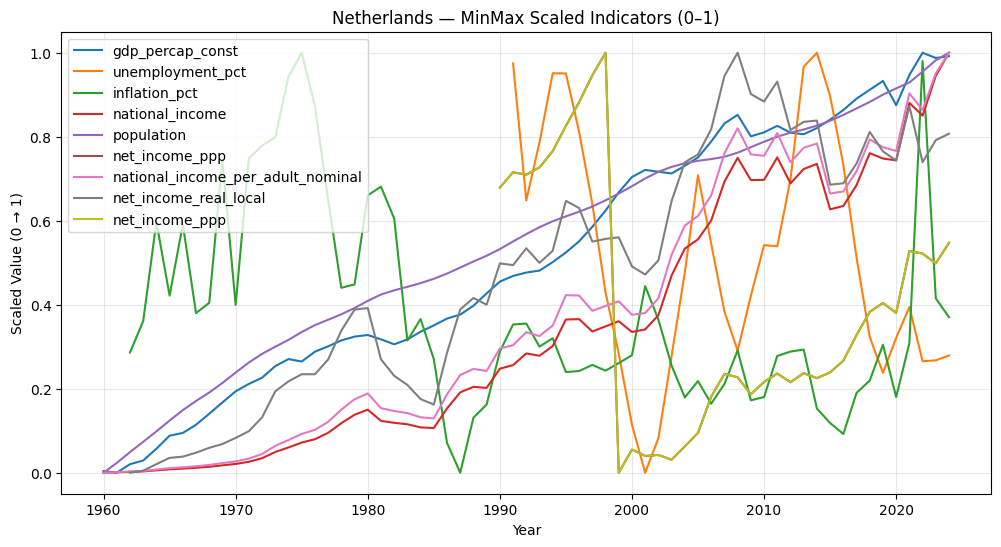

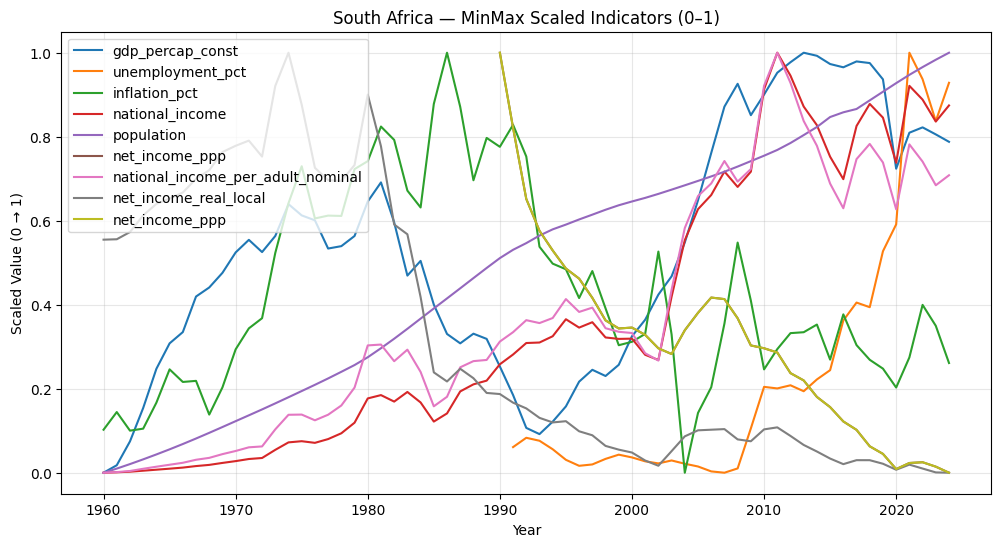

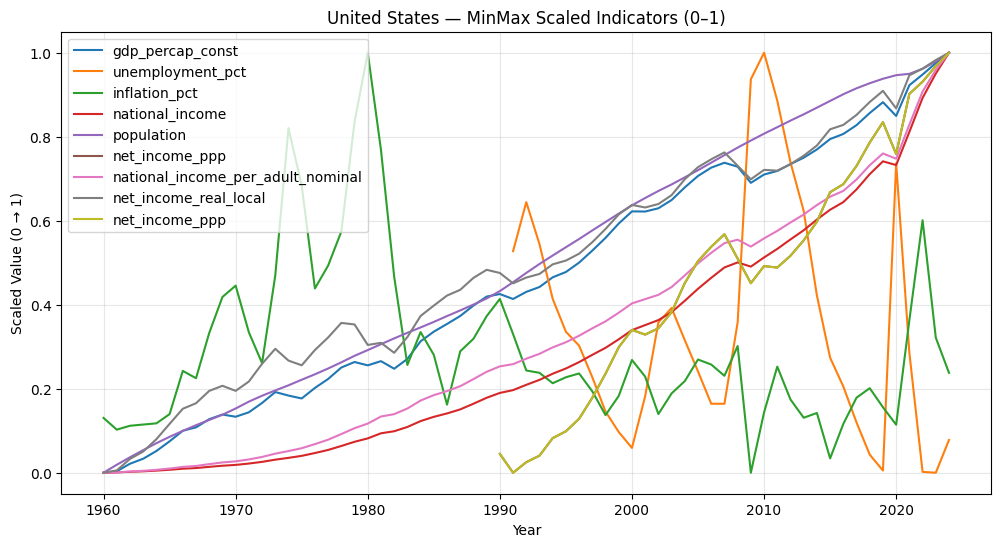

In [67]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# list of all indicators you want to scale
cols_to_scale = [
    'gdp_percap_const',
    'unemployment_pct',
    'inflation_pct',
    'national_income',
    # 'trade_pct_gdp',
    'population',
    'net_income_ppp',
    'national_income_per_adult_nominal',
    'net_income_real_local',
    'net_income_ppp',

]

scaler = MinMaxScaler(feature_range=(0, 1))

for country in indicators_df['country'].unique():
    
    df_c = indicators_df[indicators_df['country'] == country].sort_values('year')
    
    # scale the selected columns for that country only
    scaled_values = scaler.fit_transform(df_c[cols_to_scale])
    
    # plot
    plt.figure(figsize=(12, 6))
    
    for i, col in enumerate(cols_to_scale):
        plt.plot(df_c['year'], scaled_values[:, i], label=col)
    
    plt.title(f"{country} — MinMax Scaled Indicators (0–1)")
    plt.xlabel("Year")
    plt.ylabel("Scaled Value (0 → 1)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


In [68]:
lorenz_points.rename(columns={'country': 'country_code'}, inplace=True)
df_all = lorenz_points.merge(indicators_df, how='left', on=['country_code', 'year'])
df_all['population_share'] = df_all['population']*df_all['p_end']/100
df_all['net_income_share'] = df_all['national_income_real_usd']*df_all['value']
df_all.head(10)

country_code    variable percentile  year   value  age pop  p_start  p_end  \
0           IN  sptincj999       p0p1  1820  0.0009  999   j      0.0    1.0   
1           IN  sptincj999       p0p1  1850  0.0007  999   j      0.0    1.0   
2           IN  sptincj999       p0p1  1880  0.0001  999   j      0.0    1.0   
3           IN  sptincj999       p0p1  1900  0.0001  999   j      0.0    1.0   
4           IN  sptincj999       p0p1  1910  0.0007  999   j      0.0    1.0   
5           IN  sptincj999       p0p1  1920  0.0001  999   j      0.0    1.0   
6           IN  sptincj999       p0p1  1930  0.0001  999   j      0.0    1.0   
7           IN  sptincj999       p0p1  1940  0.0008  999   j      0.0    1.0   
8           IN  sptincj999       p0p1  1950  0.0002  999   j      0.0    1.0   
9           IN  sptincj999       p0p1  1951  0.0002  999   j      0.0    1.0   

   cum_pop  ...  inflation_factor cpi_index  cpi_base  \
0     0.01  ...               NaN       NaN       NaN   
1     0.01  ...               NaN       NaN       NaN   
2     0.01  ...               NaN       NaN       NaN   
3     0.01  ...               NaN       NaN       NaN   
4     0.01  ...               NaN       NaN       NaN   
5     0.01  ...               NaN       NaN       NaN   
6     0.01  ...               NaN       NaN       NaN   
7     0.01  ...               NaN       NaN       NaN   
8     0.01  ...               NaN       NaN       NaN   
9     0.01  ...               NaN       NaN       NaN   

   national_income_per_adult_nominal  net_income_real_local  net_income_ppp  \
0                                NaN                    NaN             NaN   
1                                NaN                    NaN             NaN   
2                                NaN                    NaN             NaN   
3                                NaN                    NaN             NaN   
4                                NaN                    NaN             NaN   
5                                NaN                    NaN             NaN   
6                                NaN                    NaN             NaN   
7                                NaN                    NaN             NaN   
8                                NaN                    NaN             NaN   
9                                NaN                    NaN             NaN   

   net_income_usd_fx  national_income_real_usd  population_share  \
0                NaN                       NaN               NaN   
1                NaN                       NaN               NaN   
2                NaN                       NaN               NaN   
3                NaN                       NaN               NaN   
4                NaN                       NaN               NaN   
5                NaN                       NaN               NaN   
6                NaN                       NaN               NaN   
7                NaN                       NaN               NaN   
8                NaN                       NaN               NaN   
9                NaN                       NaN               NaN   

   net_income_share  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN  

[10 rows x 31 columns]

## Total Wealth distribution 


In [69]:
df_10 = df_all[df_all['p_end']>90.0]

In [70]:
df_all[df_all['country_code']=='CN']


country_code    variable percentile  year   value  age pop  p_start  \
10561           CN  sptincj999       p0p0  1820  0.0000  999   j      0.0   
10562           CN  sptincj999       p0p0  1850  0.0000  999   j      0.0   
10563           CN  sptincj999       p0p0  1880  0.0000  999   j      0.0   
10564           CN  sptincj999       p0p0  1900  0.0000  999   j      0.0   
10565           CN  sptincj999       p0p0  1910  0.0000  999   j      0.0   
...            ...         ...        ...   ...     ...  ...  ..      ...   
17933           CN  sptincj999  p0p99.999  2020  0.9773  999   j      0.0   
17934           CN  sptincj999  p0p99.999  2021  0.9764  999   j      0.0   
17935           CN  sptincj999  p0p99.999  2022  0.9763  999   j      0.0   
17936           CN  sptincj999  p0p99.999  2023  0.9763  999   j      0.0   
17937           CN  sptincj999  p0p99.999  2024  0.9763  999   j      0.0   

        p_end  cum_pop  ...  inflation_factor cpi_index  cpi_base  \
10561   0.000  0.00000  ...               NaN       NaN       NaN   
10562   0.000  0.00000  ...               NaN       NaN       NaN   
10563   0.000  0.00000  ...               NaN       NaN       NaN   
10564   0.000  0.00000  ...               NaN       NaN       NaN   
10565   0.000  0.00000  ...               NaN       NaN       NaN   
...       ...      ...  ...               ...       ...       ...   
17933  99.999  0.99999  ...          1.024194  2.509646  1.586191   
17934  99.999  0.99999  ...          1.009810  2.534266  1.586191   
17935  99.999  0.99999  ...          1.019736  2.584282  1.586191   
17936  99.999  0.99999  ...          1.002348  2.590351  1.586191   
17937  99.999  0.99999  ...          1.002181  2.596001  1.586191   

       national_income_per_adult_nominal  net_income_real_local  \
10561                                NaN                    NaN   
10562                                NaN                    NaN   
10563                                NaN                    NaN   
10564                                NaN                    NaN   
10565                                NaN                    NaN   
...                                  ...                    ...   
17933                       10544.120473            6664.283644   
17934                       12799.535429            8011.200265   
17935                       12862.107113            7894.558660   
17936                       12845.194999            7865.706695   
17937                       13210.342045            8071.696406   

       net_income_ppp  net_income_usd_fx  national_income_real_usd  \
10561             NaN                NaN                       NaN   
10562             NaN                NaN                       NaN   
10563             NaN                NaN                       NaN   
10564             NaN                NaN                       NaN   
10565             NaN                NaN                       NaN   
...               ...                ...                       ...   
17933    11455.194223         965.730822              9.403971e+12   
17934    12956.793064        1242.243929              1.131470e+13   
17935    14018.533715        1171.793585              1.114850e+13   
17936    15292.166896        1110.348454              1.109623e+13   
17937    16445.903229        1121.459726              1.137282e+13   

       population_share  net_income_share  
10561               NaN               NaN  
10562               NaN               NaN  
10563               NaN               NaN  
10564               NaN               NaN  
10565               NaN               NaN  
...                 ...               ...  
17933      1.411086e+09      9.190501e+12  
17934      1.412346e+09      1.104767e+13  
17935      1.412161e+09      1.088428e+13  
17936      1.410696e+09      1.083325e+13  
17937      1.408961e+09      1.110328e+13  

[7377 rows x 31 columns]

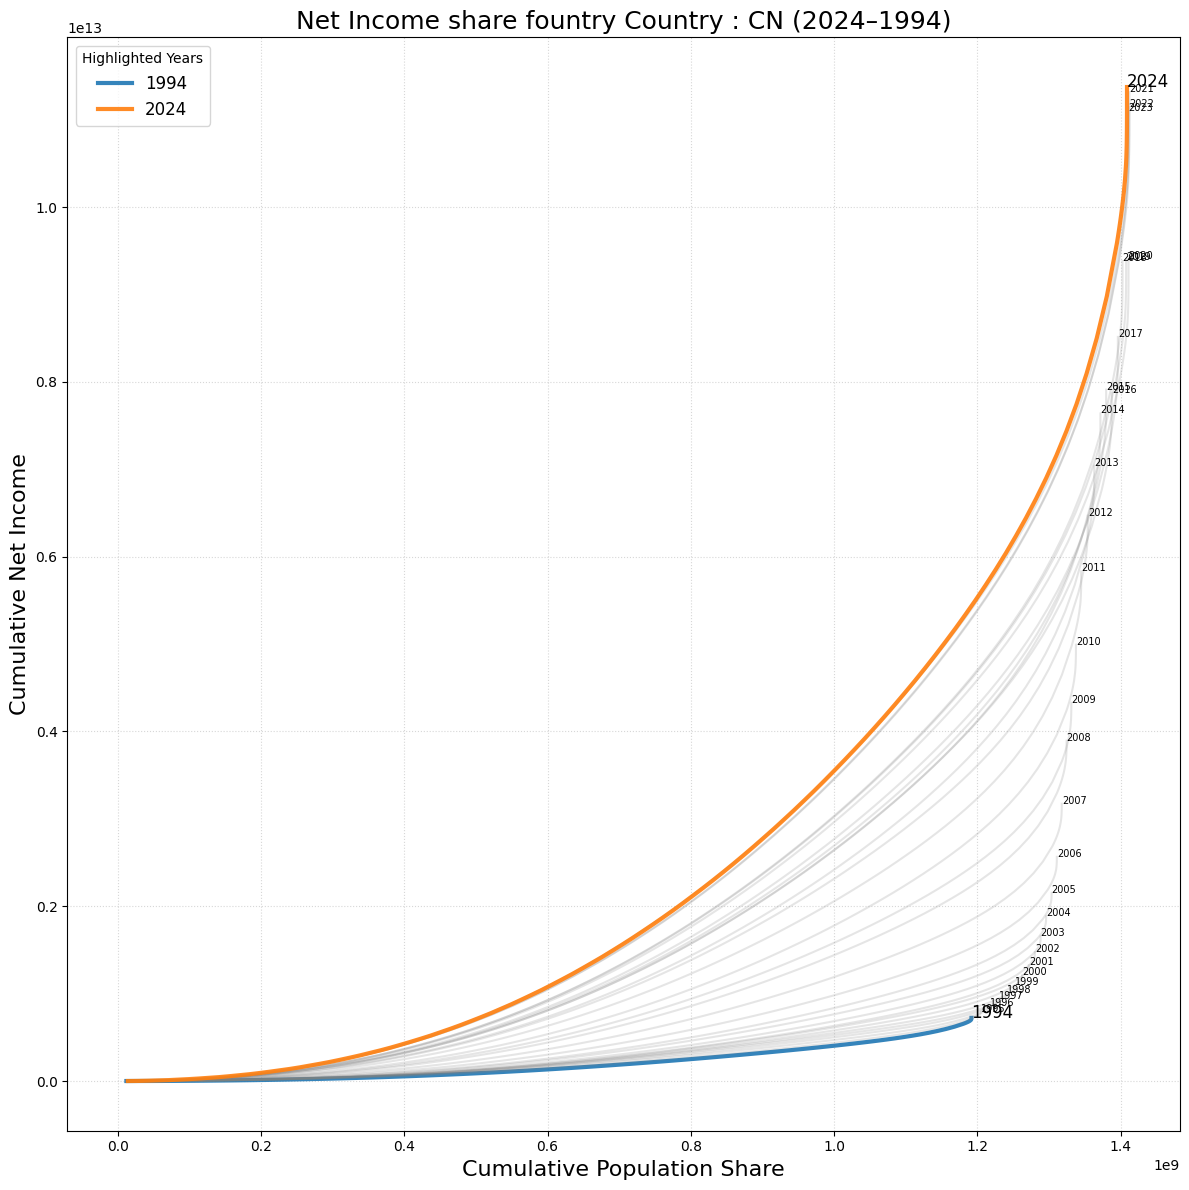

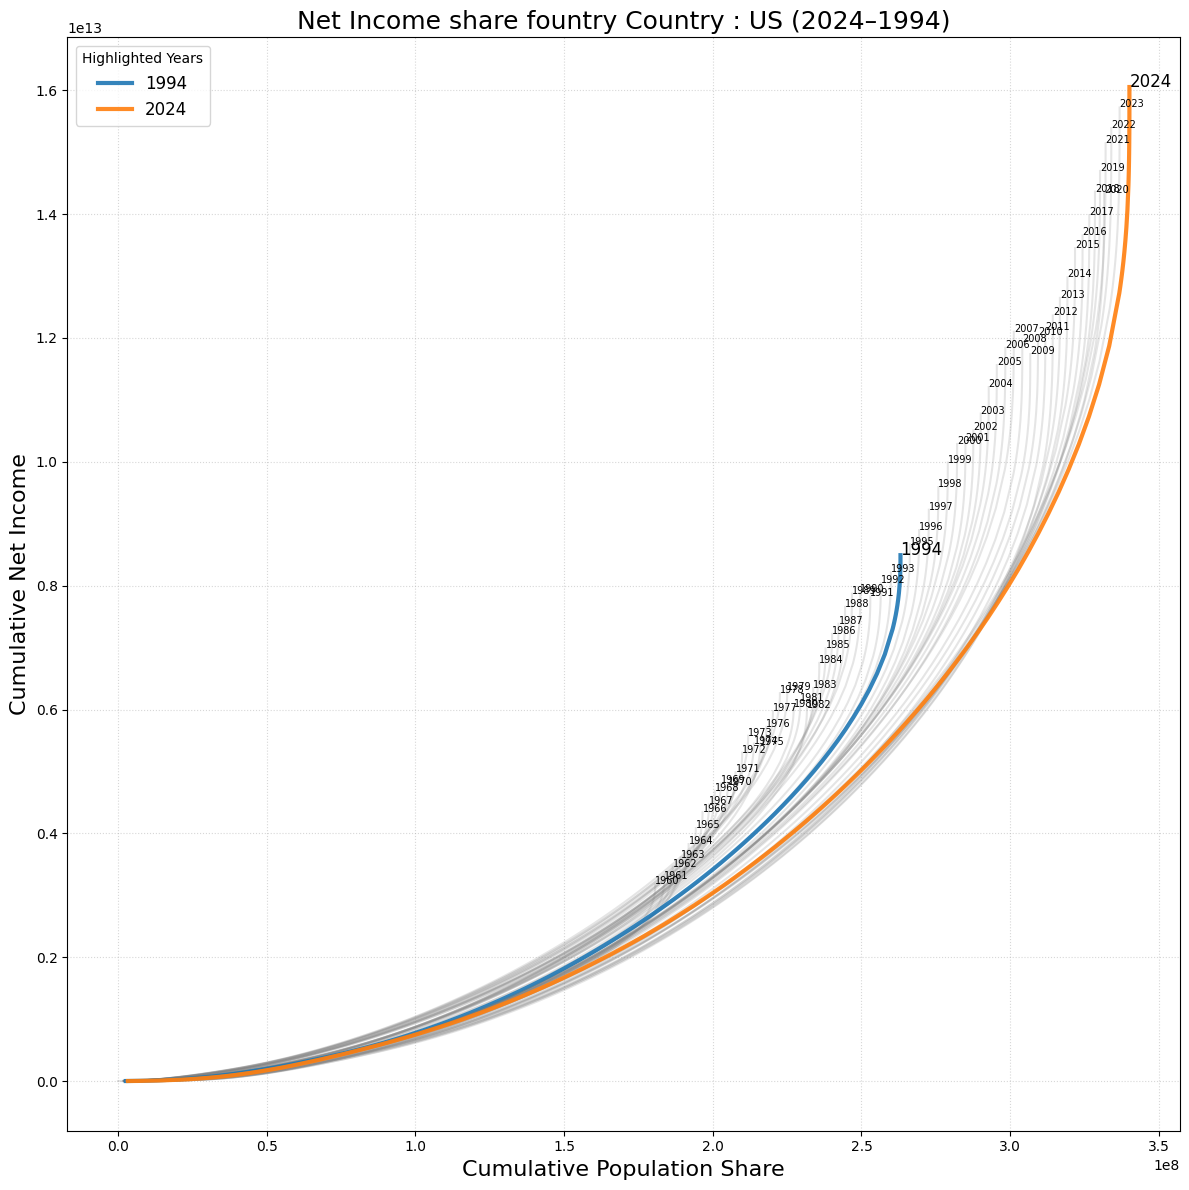

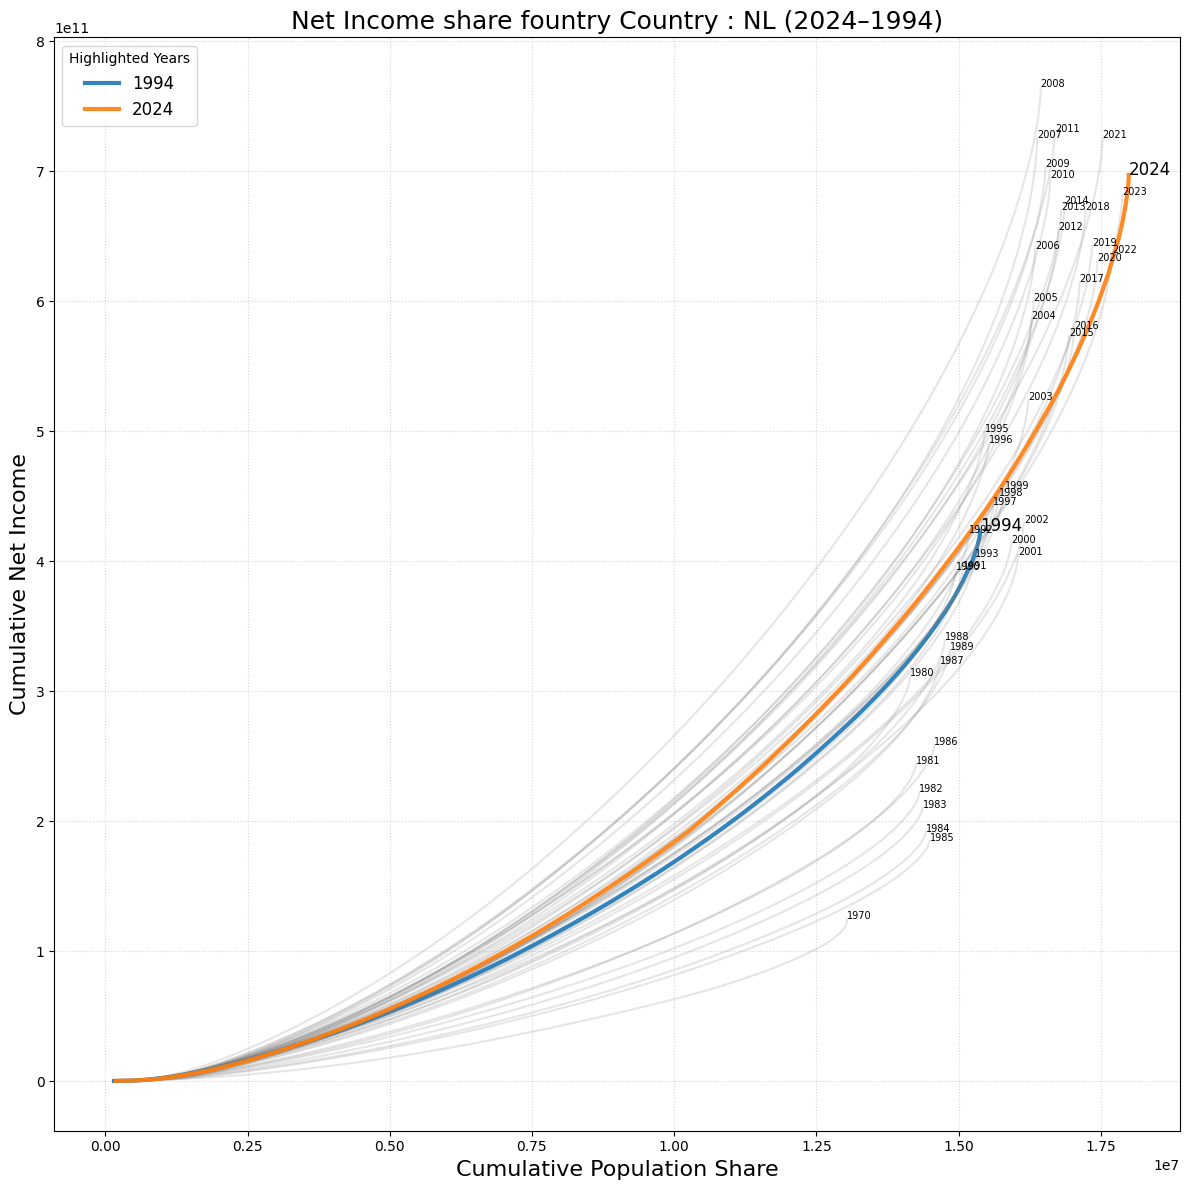

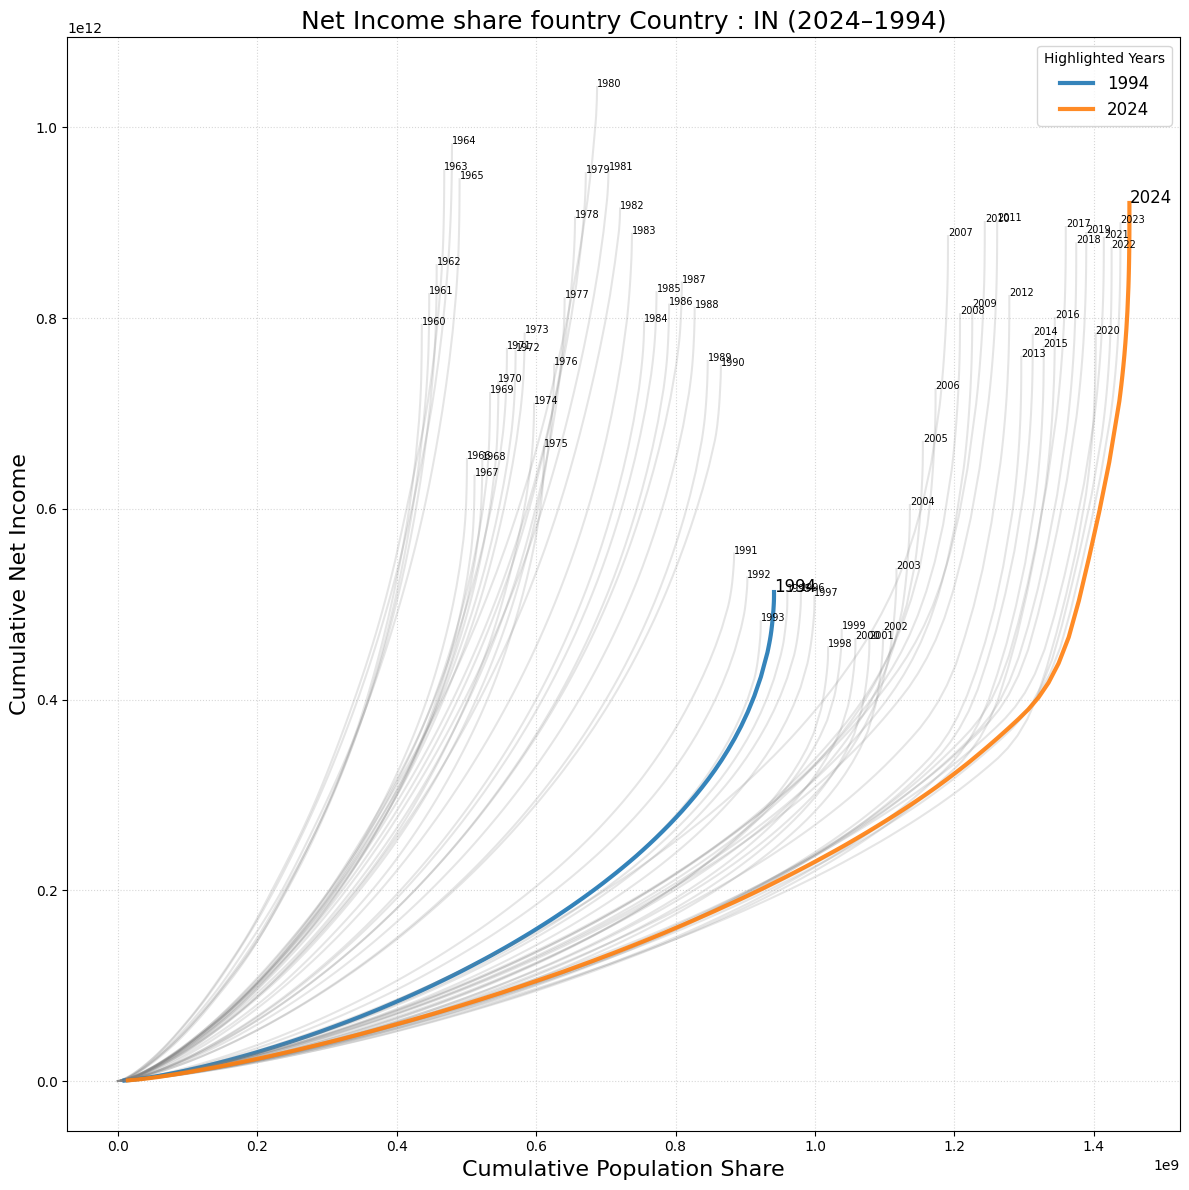

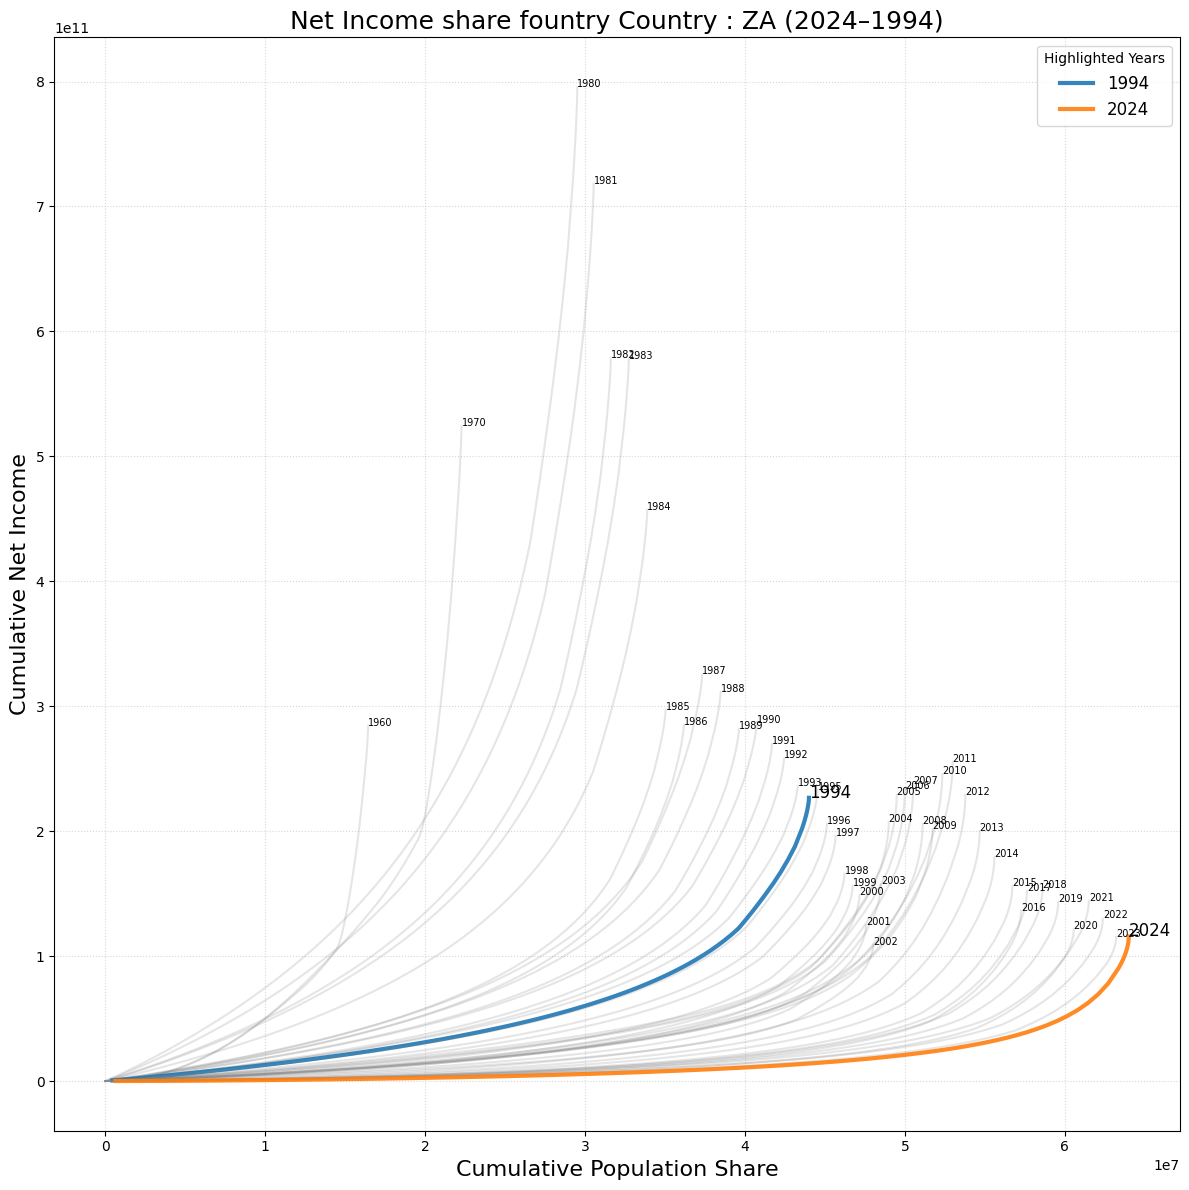

In [74]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'NL', 'IN', 'ZA']
for code in country_code:

    # Get available years for IN
    years = sorted(df_all[df_all['country_code']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 1994
    middle_year = 1990

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = df_all[(df_all['country_code']==code) & (df_all['year']==year)]
        df_cnt = df_cnt.sort_values('population_share')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['population_share'].iloc[-1] - 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'], 
                    color="gray", alpha=0.2)
            plt.text(df_cnt['population_share'].iloc[-1] + 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=7)        

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Net Income share fountry Country : {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Net Income", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"Net_Income_share_cured_{code}.png")
    plt.show()

In [58]:
df_all[(df_all['year']==2024) & (df_all['country_code']==code)]

country_code    variable percentile  year   value  age pop  p_start  \
82              IN  sptincj999       p0p1  2024  0.0008  999   j      0.0   
165             IN  sptincj999      p0p10  2024  0.0164  999   j      0.0   
248             IN  sptincj999     p0p100  2024  1.0000  999   j      0.0   
331             IN  sptincj999      p0p11  2024  0.0187  999   j      0.0   
414             IN  sptincj999      p0p12  2024  0.0210  999   j      0.0   
...            ...         ...        ...   ...     ...  ...  ..      ...   
10228           IN  sptincj999  p0p99.995  2024  0.9656  999   j      0.0   
10311           IN  sptincj999  p0p99.996  2024  0.9680  999   j      0.0   
10394           IN  sptincj999  p0p99.997  2024  0.9708  999   j      0.0   
10477           IN  sptincj999  p0p99.998  2024  0.9743  999   j      0.0   
10560           IN  sptincj999  p0p99.999  2024  0.9793  999   j      0.0   

         p_end  cum_pop  ...  country gdp_percap_const  unemployment_pct  \
82       1.000  0.01000  ...    India      2396.712719             4.202   
165     10.000  0.10000  ...    India      2396.712719             4.202   
248    100.000  1.00000  ...    India      2396.712719             4.202   
331     11.000  0.11000  ...    India      2396.712719             4.202   
414     12.000  0.12000  ...    India      2396.712719             4.202   
...        ...      ...  ...      ...              ...               ...   
10228   99.995  0.99995  ...    India      2396.712719             4.202   
10311   99.996  0.99996  ...    India      2396.712719             4.202   
10394   99.997  0.99997  ...    India      2396.712719             4.202   
10477   99.998  0.99998  ...    India      2396.712719             4.202   
10560   99.999  0.99999  ...    India      2396.712719             4.202   

       inflation_pct  national_income  trade_pct_gdp  education_atainment  \
82          4.953036     3.856153e+12      44.671093               65.309   
165         4.953036     3.856153e+12      44.671093               65.309   
248         4.953036     3.856153e+12      44.671093               65.309   
331         4.953036     3.856153e+12      44.671093               65.309   
414         4.953036     3.856153e+12      44.671093               65.309   
...              ...              ...            ...                  ...   
10228       4.953036     3.856153e+12      44.671093               65.309   
10311       4.953036     3.856153e+12      44.671093               65.309   
10394       4.953036     3.856153e+12      44.671093               65.309   
10477       4.953036     3.856153e+12      44.671093               65.309   
10560       4.953036     3.856153e+12      44.671093               65.309   

         population  income_share  population_share  
82     1.450936e+09  3.084922e+09      1.450936e+07  
165    1.450936e+09  6.324091e+10      1.450936e+08  
248    1.450936e+09  3.856153e+12      1.450936e+09  
331    1.450936e+09  7.211006e+10      1.596029e+08  
414    1.450936e+09  8.097922e+10      1.741123e+08  
...             ...           ...               ...  
10228  1.450936e+09  3.723501e+12      1.450863e+09  
10311  1.450936e+09  3.732756e+12      1.450878e+09  
10394  1.450936e+09  3.743553e+12      1.450892e+09  
10477  1.450936e+09  3.757050e+12      1.450907e+09  
10560  1.450936e+09  3.776331e+12      1.450921e+09  

[127 rows x 21 columns]

In [ ]:
df_all['income_share']